In [190]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

# # Data Exploration 
# import missingno as msno
# import klib
from sklearn.impute import SimpleImputer 

# train test split
from sklearn.model_selection import train_test_split

# encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import OrdinalEncoder, BinaryEncoder

# column transformer & pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# column transformer & pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler 
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

# Library
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier, StackingClassifier

# algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import KBinsDiscretizer


# Ensamble 
from sklearn.ensemble import VotingClassifier, StackingClassifier

# Bagging 
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# Boosting
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier

# metric
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# WARNING PYTHON:
import warnings
warnings.filterwarnings("ignore")

| Nama Atribut | Tipe Data | Deskripsi |
|--------------|-----------|-----------|
| Usia (Age) | Int | Usia dari Klien |
| Pekerjaan (Job) | Text | Pekerjaan klien |
| Saldo (Balance) | Float | Saldo yang dimiliki klien / terakhir |
| Perumahan (Housing) | Text | Apakah klien memiliki rumah |
| Pinjaman (Loan) | Text | Apakah klien memiliki pinjaman pribadi |
| Kontak (Contact) | Text | Jenis komunikasi kontak yang digunakan |
| Bulan (Month) | Text | Bulan kontak terakhir dalam setahun |
| Kampanye (Campaign) | Text | Jumlah kontak yang dilakukan selama kampanye ini dan untuk klien ini |
| Pdays | Float | Jumlah hari setelah klien dihubungi dari kampanye sebelumnya |
| Hasil (Poutcome) | Text | Hasil dari kampanye pemasaran sebelumnya |
| Deposit | Integer | Apakah nasabah Deposit atau tidak, 1 untuk deposit dan 0 untuk tidak deposit |


## **Business Context**

Term deposit adalah produk perbankan di mana nasabah menyetorkan sejumlah dana ke dalam rekening bank untuk jangka waktu tertentu dengan suku bunga tetap yang disepakati. Jangka waktu biasanya bervariasi, mulai dari beberapa bulan hingga beberapa tahun, dan nasabah biasanya tidak dapat menarik dana mereka sebelum jangka waktu tertentu berakhir tanpa adanya sanksi atau biaya.

Bank memanfaatkan dana dari term deposit untuk berbagai keperluan, termasuk:

Pemberian Kredit: Salah satu cara utama bank memanfaatkan dana dari term deposit adalah dengan memberikan kredit kepada nasabah lain, baik dalam bentuk pinjaman pribadi, hipotek, kredit usaha, atau produk kredit lainnya. Dana dari term deposit memberikan sumber dana yang stabil bagi bank untuk memberikan kredit kepada nasabah yang membutuhkan.

Investasi: Bank juga dapat menggunakan dana dari term deposit untuk melakukan investasi, baik dalam bentuk investasi keuangan seperti obligasi, saham, atau instrumen pasar modal lainnya, maupun investasi dalam aset fisik seperti properti atau infrastruktur. Investasi ini bertujuan untuk menghasilkan pendapatan tambahan bagi bank.

Operasional Bank: Dana dari term deposit juga digunakan untuk membiayai operasional sehari-hari bank, termasuk biaya overhead, pembayaran gaji karyawan, dan biaya administrasi lainnya.

Pemenuhan Kewajiban: Bank juga memiliki kewajiban untuk memenuhi kewajiban kepada nasabah yang menyetorkan dana ke dalam term deposit, yaitu memberikan kembali dana pokok dan bunga sesuai dengan perjanjian yang telah disepakati.

Pengelolaan dana dari term deposit menjadi salah satu faktor kunci dalam manajemen risiko dan keuangan bank. Bank harus memastikan bahwa dana tersebut dikelola dengan bijaksana untuk meminimalkan risiko dan memaksimalkan pengembalian bagi pemegang saham dan nasabah. Oleh karena itu, bank biasanya memiliki departemen keuangan dan manajemen risiko yang bertanggung jawab atas pengelolaan dana tersebut dengan hati-hati dan sesuai dengan peraturan yang berlaku.

## **Businesss Problem**

- **Latar Belakang Permasalahan** : Bank ingin membuat sistem yang membantu memutuskan nasabah mana yang akan ditargetkan dalam kampanye pemasaran deposito berjangka. Sistem ini akan memprediksi apakah nasabah akan menjawab "ya" atau "tidak" terhadap tawaran deposito berjangka.

- **Background** : Bank melakukan kampanye pemasaran untuk mempromosikan deposito berjangka kepada nasabah. Untuk membuat kampanye ini lebih efisien, kami ingin menggunakan pembelajaran mesin untuk memprediksi nasabah mana yang cenderung berlangganan deposito berjangka setelah dihubungi.



> referensi 1 : https://southstatecorrespondent.com/banker-to-banker/deposits/deposit-profitability-the-operating-cost-of-your-deposits/

Biaya pemasaran untuk menarik dan mempertahankan pelanggan cukup besar, namun umumnya lebih kecil dibandingkan potensi kerugian jika tidak mendapatkan simpanan(deposit) di bank . Upaya pemasaran sering kali terfokus pada produk bernilai tinggi seperti rekening giro bisnis dan rekening pasar uang karena profitabilitasnya yang tinggi dan umur panjangnya. Investasi dalam pemasaran produk-produk ini bertujuan untuk memastikan hubungan pelanggan jangka panjang, yang memberikan kontribusi signifikan terhadap profitabilitas bank dari waktu ke waktu​ (Divisi Koresponden SouthState)​.

> referensi 2 : - https://www.americanbanker.com/list/why-bank-ceos-are-growing-more-optimistic-about-deposit-costs
                - https://thefinancialbrand.com/news/bank-marketing/deposit-strategies-must-be-revised-before-funds-exit-for-higher-rates-154493/
                
Potensi kerugian akibat simpanan yang terlewat dapat melebihi pengeluaran pemasaran karena meningkatnya biaya dana, kebutuhan untuk menjaga likuiditas, dan pentingnya simpanan yang strategis bagi kesehatan keuangan bank. Oleh karena itu, bank harus secara hati-hati menyeimbangkan investasi pemasarannya untuk menarik dan mempertahankan simpanan sambil mengelola biaya terkait.

- **Berdasarkan latar belakang dan referensi yang telah di tentukan, didapatkan kesimpulan bahwasannya kerugian yang dihadapi bank lebih besar ketika kehilangan nasabah untuk deposit dibandingkan biaya pemasaran yang dilakukan untuk marketing bank campaign**




> 1. False Positive (FP): Ini terjadi ketika model memprediksi bahwa seorang klien akan melakukan deposit , tetapi kenyataannya klien tersebut sebenarnya tidak melakukan deposit. Dalam konteks kampanye pemasaran, false positive berarti bank mungkin menganggap seorang klien sebagai prospek yang baik untuk melakukan deposit, sehingga mungkin menghabiskan sumber daya tambahan dalam upaya untuk menarik mereka, tetapi pada kenyataannya, usaha tersebut tidak menghasilkan hasil yang diharapkan. Asumsi dana yang dikeluarkan untuk pemasaran adalah $500 USD

> 2. False Negative (FN): Ini terjadi ketika model memprediksi bahwa seorang klien tidak akan melakukan deposit , tetapi kenyataannya klien tersebut sebenarnya melakukan deposit . Dalam konteks kampanye pemasaran, false negative berarti bank mungkin melewatkan peluang untuk menarik klien yang sebenarnya berpotensi untuk melakukan deposit. Klien ini mungkin memiliki karakteristik atau perilaku yang seharusnya menunjukkan kemungkinan tinggi untuk melakukan deposit, tetapi karena prediksi model salah, bank tidak melakukan tindakan untuk menargetkan mereka. Asumsi kerugian yang terjadi akbibat salah prediksi adalah $1500 USD


**Metric Scoring yang di gunakan adalah “Recall”. Hal ini digunakan karena berdasarkan permasalahan bisnis, aspek False Negative perlu diminimalkan. Oleh karena itu, perlu menggunakan Recall untuk meminimalkan False Negative.**

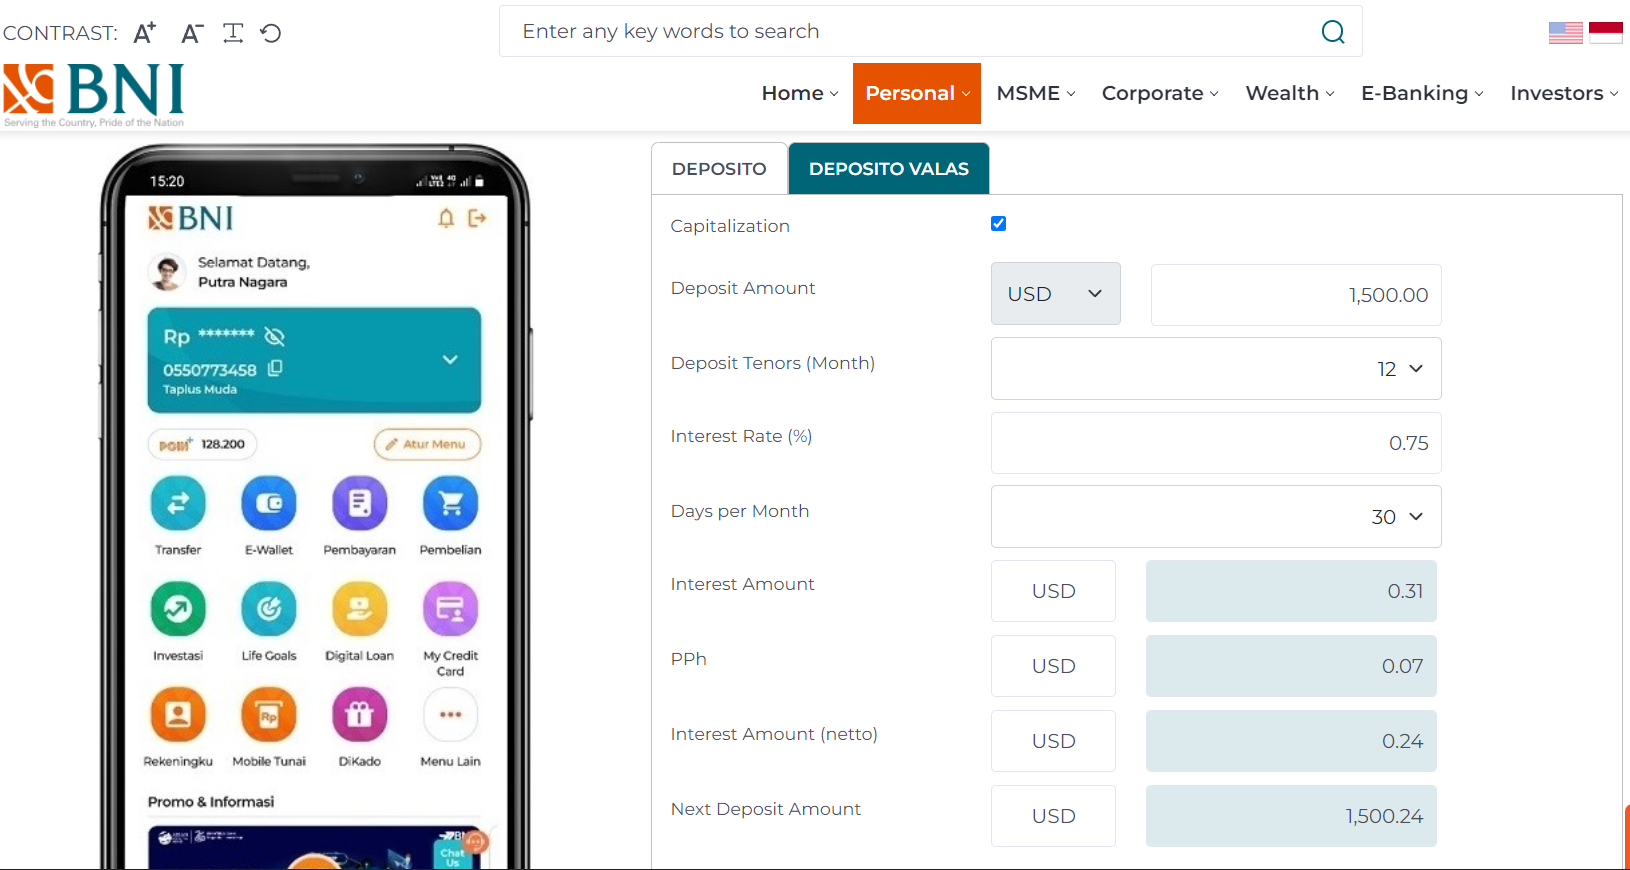

## **1.Load Data Set**

In [191]:
df = pd.read_csv('data_bank_marketing_campaign.csv')
df

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
7808,62,housemaid,2,no,no,cellular,nov,1,-1,unknown,yes
7809,48,housemaid,5473,no,no,cellular,feb,2,184,success,yes
7810,36,unknown,179,no,no,cellular,aug,8,-1,unknown,no
7811,31,admin.,54,yes,no,cellular,nov,1,-1,unknown,no


Data Set Overview :
- Pada dataset kita memiliki 7813 baris dan 11 kolom 
- Pada 1 baris terdapat 1 nasabah 

In [192]:
df.shape

(7813, 11)

## **2.Data Exploration**

Mari kita jelajahi data lebih jauh dengan mengidentifikasi apa saja isi datanya, nilai yang hilang, duplikat, outlier, dll dengan pendekatan pengetahuan domain.

**2.1 Check Target**

In [193]:
df['deposit'] = np.where(df['deposit'] == 'yes', 1, 0).astype('int64')

Mengubah target (deposit 1 untuk deposit, dan 0 untuk tidak deposit)

In [194]:
df['deposit'].value_counts()

deposit
0    4081
1    3732
Name: count, dtype: int64

## **Check Imbalance Target**

In [195]:
distribution = df['deposit'].value_counts() / len(df)
distribution

deposit
0    0.522335
1    0.477665
Name: count, dtype: float64

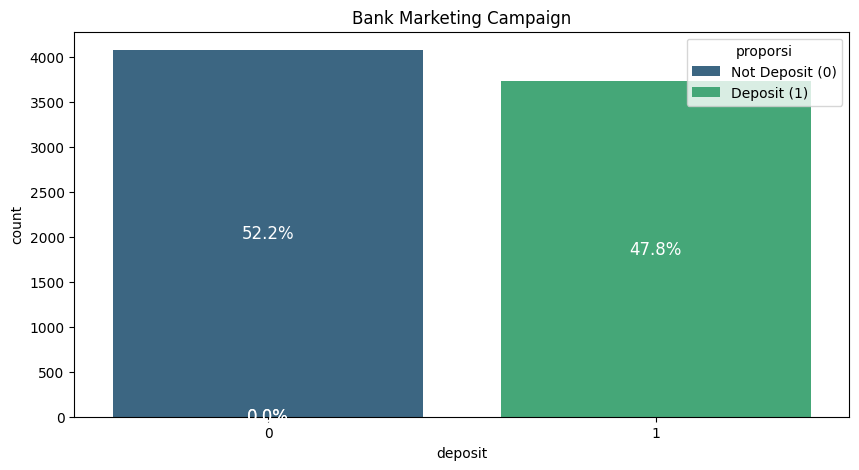

In [196]:
# Buat figure dan countplot
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='deposit', hue='deposit', data=df, palette='viridis')

# Tambahkan judul
plt.title('Bank Marketing Campaign')

# Hitung total nilai
total = len(df)

# Tambahkan anotasi persentase
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total:.1%}', 
                (p.get_x() + p.get_width() / 2., height / 2),
                ha='center', va='center', color='white', fontsize=12)

# Tambahkan legend dengan label yang sesuai
labels = ['Not Deposit (0)', 'Deposit (1)']
plt.legend(labels=labels, title='proporsi', loc='upper right')

# Tampilkan plot
plt.show()

Dari presentase target (deposit) sudah terdistribusi normal 52.2% untuk 0(no) dan 47.8% untuk 1(yes), sehingga tidak dibutuhkan imbalance treatment untuk analisis lebih lanjut

## **Check Missing Values**

In [197]:
df.isna().sum()

age         0
job         0
balance     0
housing     0
loan        0
contact     0
month       0
campaign    0
pdays       0
poutcome    0
deposit     0
dtype: int64

tidak terdapat missing value pada dataset

## **Check Duplicate Data**

In [198]:
df.duplicated().sum()

8

In [199]:
df.drop_duplicates(inplace=True)

terdapat 

## **Check Outliers Data**

In [200]:
# List of numerical features to be standardized
numerical_features = ['age', 'balance', 'campaign', 'pdays']

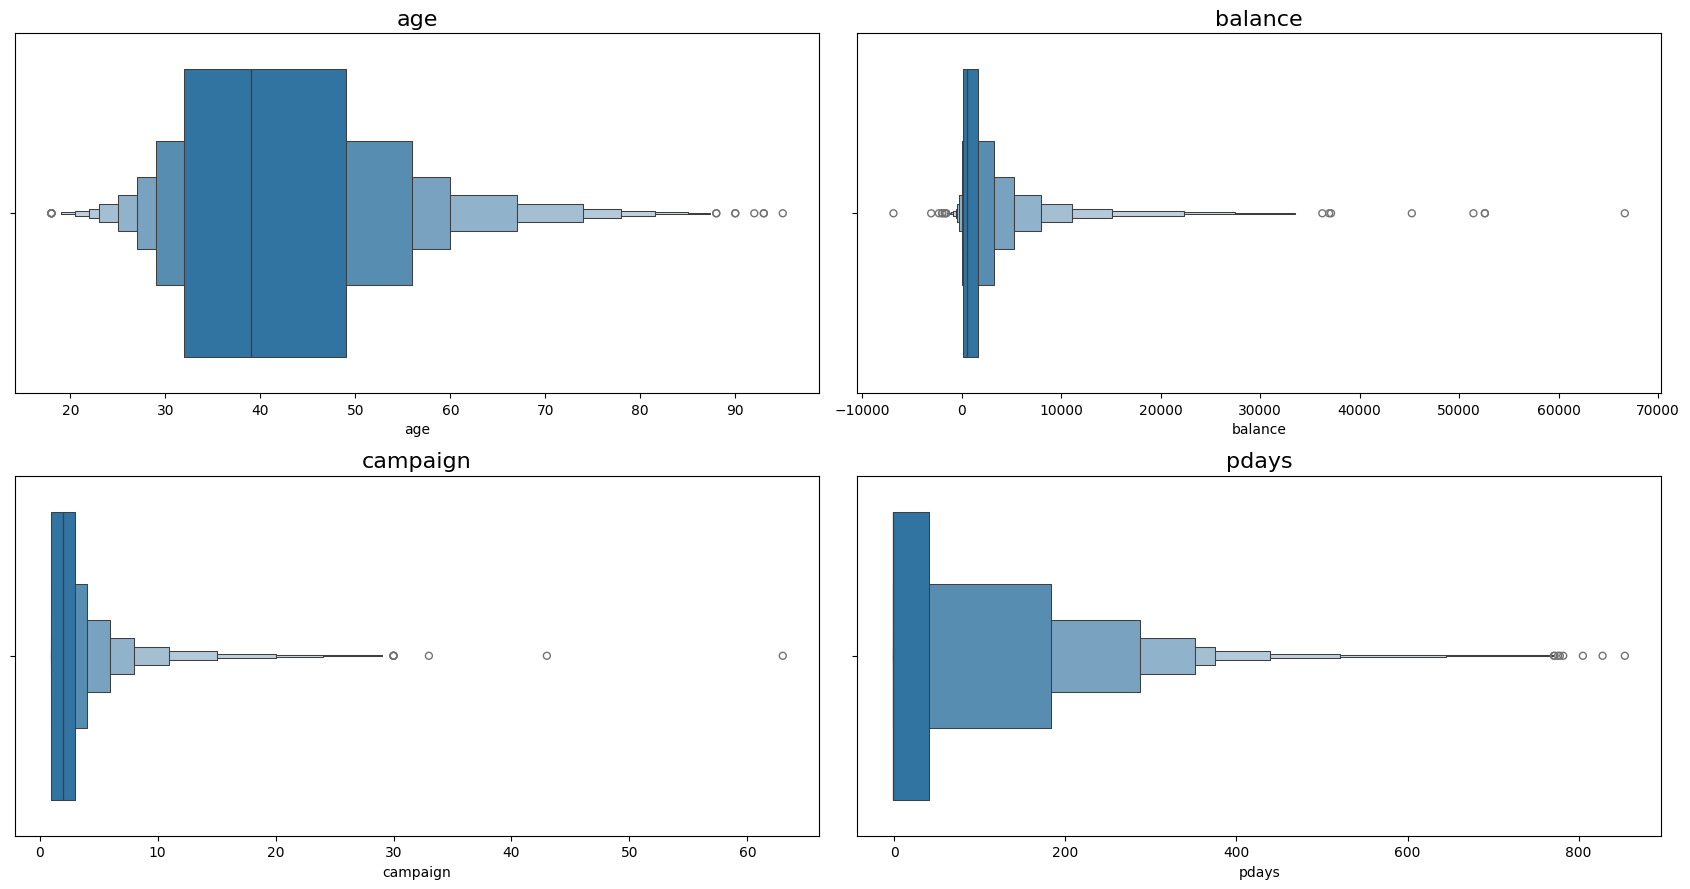

In [201]:
plt.figure(figsize=(17,9))
plotnumber = 1

for feature in numerical_features:
    ax = plt.subplot(2,2, plotnumber)
    sns.boxenplot(x=feature, data=df)
    plt.title(feature, fontsize= 16)
    plt.tight_layout()
    plotnumber += 1

plt.show();

**Data Approach with Domain Knowledge**

Beradsarkan chekking outliers pada kolom numerik terdapat beberapa outliers akan tetapi ini tidak akan di hapus / di handling lebih lanjut karena setiap informasi yang ada di kolom tersebut dibutuhkan untuk analisis lebih lanjut, untuk mencegahnnya akan dilakukan binning pada preprocessing agar tidak terlalu mengubah persebaran data

## **Modifikasi Data**

In [202]:
pd.set_option('display.max_colwidth', None) 

def unique_df(df):
    df_unique = pd.DataFrame(columns=["Columns", "Nunique", "Unique"])
    df_unique["Columns"] = df.columns
    df_unique["Nunique"] = [df[col].nunique() for col in df.columns]
    df_unique["Unique"] = [df[col].unique() for col in df.columns]
    return df_unique

unique_df(df)

,Columns,Nunique,Unique
0,age,75,"[55, 39, 51, 38, 36, 41, 37, 35, 57, 23, 33, 31, 53, 30, 46, 48, 25, 29, 28, 52, 49, 44, 42, 27, 47, 64, 26, 34, 56, 32, 58, 45, 54, 50, 79, 65, 40, 24, 60, 43, 61, 59, 62, 68, 82, 71, 73, 76, 69, 20, 72, 22, 67, 19, 70, 75, 63, 93, 77, 80, 66, 21, 87, 81, 92, 88, 84, 83, 78, 74, 18, 85, 95, 86, 90]"
1,job,12,"[admin., self-employed, services, housemaid, technician, management, student, blue-collar, entrepreneur, retired, unemployed, unknown]"
2,balance,3153,"[1662, -3058, 3025, -87, 205, -76, 4803, 911, 805, 0, 1234, 1107, 1170, 341, 4808, 88, 169, 863, 242, 2597, 4929, 277, 1438, 15, 3733, 204, 1684, 1025, 55, 19, 348, 785, 742, 511, 6651, 1612, 555, 54, 1185, 110, 950, 412, 228, 367, 3993, 2599, 3528, 32, 551, 3161, 533, 8725, 349, 514, 2688, -194, 154, 874, 2, 5953, 1269, -327, 235, 7, 2661, 1948, 20, 502, 193, 13658, 1716, 172, 1667, 157, 8, 951, 427, 241, 469, 2060, 7177, 655, -114, 588, -971, 4570, 250, 131, 93, 22, 15341, 356, 190, -124, 2228, -60, 376, 1567, 855, 4151, ...]"
3,housing,2,"[no, yes]"
4,loan,2,"[no, yes]"
5,contact,3,"[cellular, telephone, unknown]"
6,month,12,"[jun, apr, may, nov, jan, sep, feb, mar, aug, jul, oct, dec]"
7,campaign,32,"[2, 3, 1, 4, 5, 6, 7, 30, 8, 9, 11, 14, 10, 28, 63, 12, 24, 17, 15, 18, 19, 13, 21, 23, 22, 33, 16, 25, 26, 20, 29, 43]"
8,pdays,422,"[-1, 352, 21, 91, 186, 263, 96, 355, 294, 412, 89, 114, 276, 93, 175, 57, 323, 156, 86, 95, 271, 182, 289, 334, 269, 309, 144, 183, 417, 138, 254, 337, 171, 389, 87, 170, 165, 372, 247, 98, 196, 469, 272, 104, 63, 587, 336, 145, 130, 28, 202, 324, 147, 94, 328, 420, 179, 90, 81, 160, 298, 356, 357, 267, 430, 52, 181, 365, 237, 330, 103, 374, 75, 133, 321, 204, 782, 266, 197, 270, 318, 349, 187, 359, 490, 192, 227, 100, 168, 177, 251, 301, 350, 92, 184, 345, 290, 199, 333, 169, ...]"
9,poutcome,4,"[unknown, other, failure, success]"


In [203]:
df['contact'].value_counts()

contact
cellular     5623
unknown      1636
telephone     546
Name: count, dtype: int64

Nilai unknown akan tetap di pertahankan karena asumsi nya salah input ketika melakukan inputing data, selain feature ini 

In [204]:
df['poutcome'].value_counts()

poutcome
unknown    5811
failure     848
success     761
other       385
Name: count, dtype: int64

In [205]:
df['poutcome'].replace('other', 'unknown', inplace=True)

Nilai other pada nilai poutcome akan diubah menjadi unknown

In [206]:
df['job'].value_counts()

job
management       1789
blue-collar      1343
technician       1289
admin.            936
services          658
retired           540
self-employed     280
unemployed        249
student           247
entrepreneur      236
housemaid         184
unknown            54
Name: count, dtype: int64

In [207]:
# Menghapus nilai 'unknown' dari kolom 'job' dengan inplace=True
df.drop(df[df['job'] == 'unknown'].index, inplace=True)

nilai unknown pada kolom job akan dihapus karena hanya terdiri dari 52 data dimana ketika ini dihapus tidak akan terlalu mempengaruhi analisis

## **Explaratory Data Analysis**

**EDA Categorical Feature**

In [208]:

cat_cols = df.select_dtypes(include="object").columns.to_list()

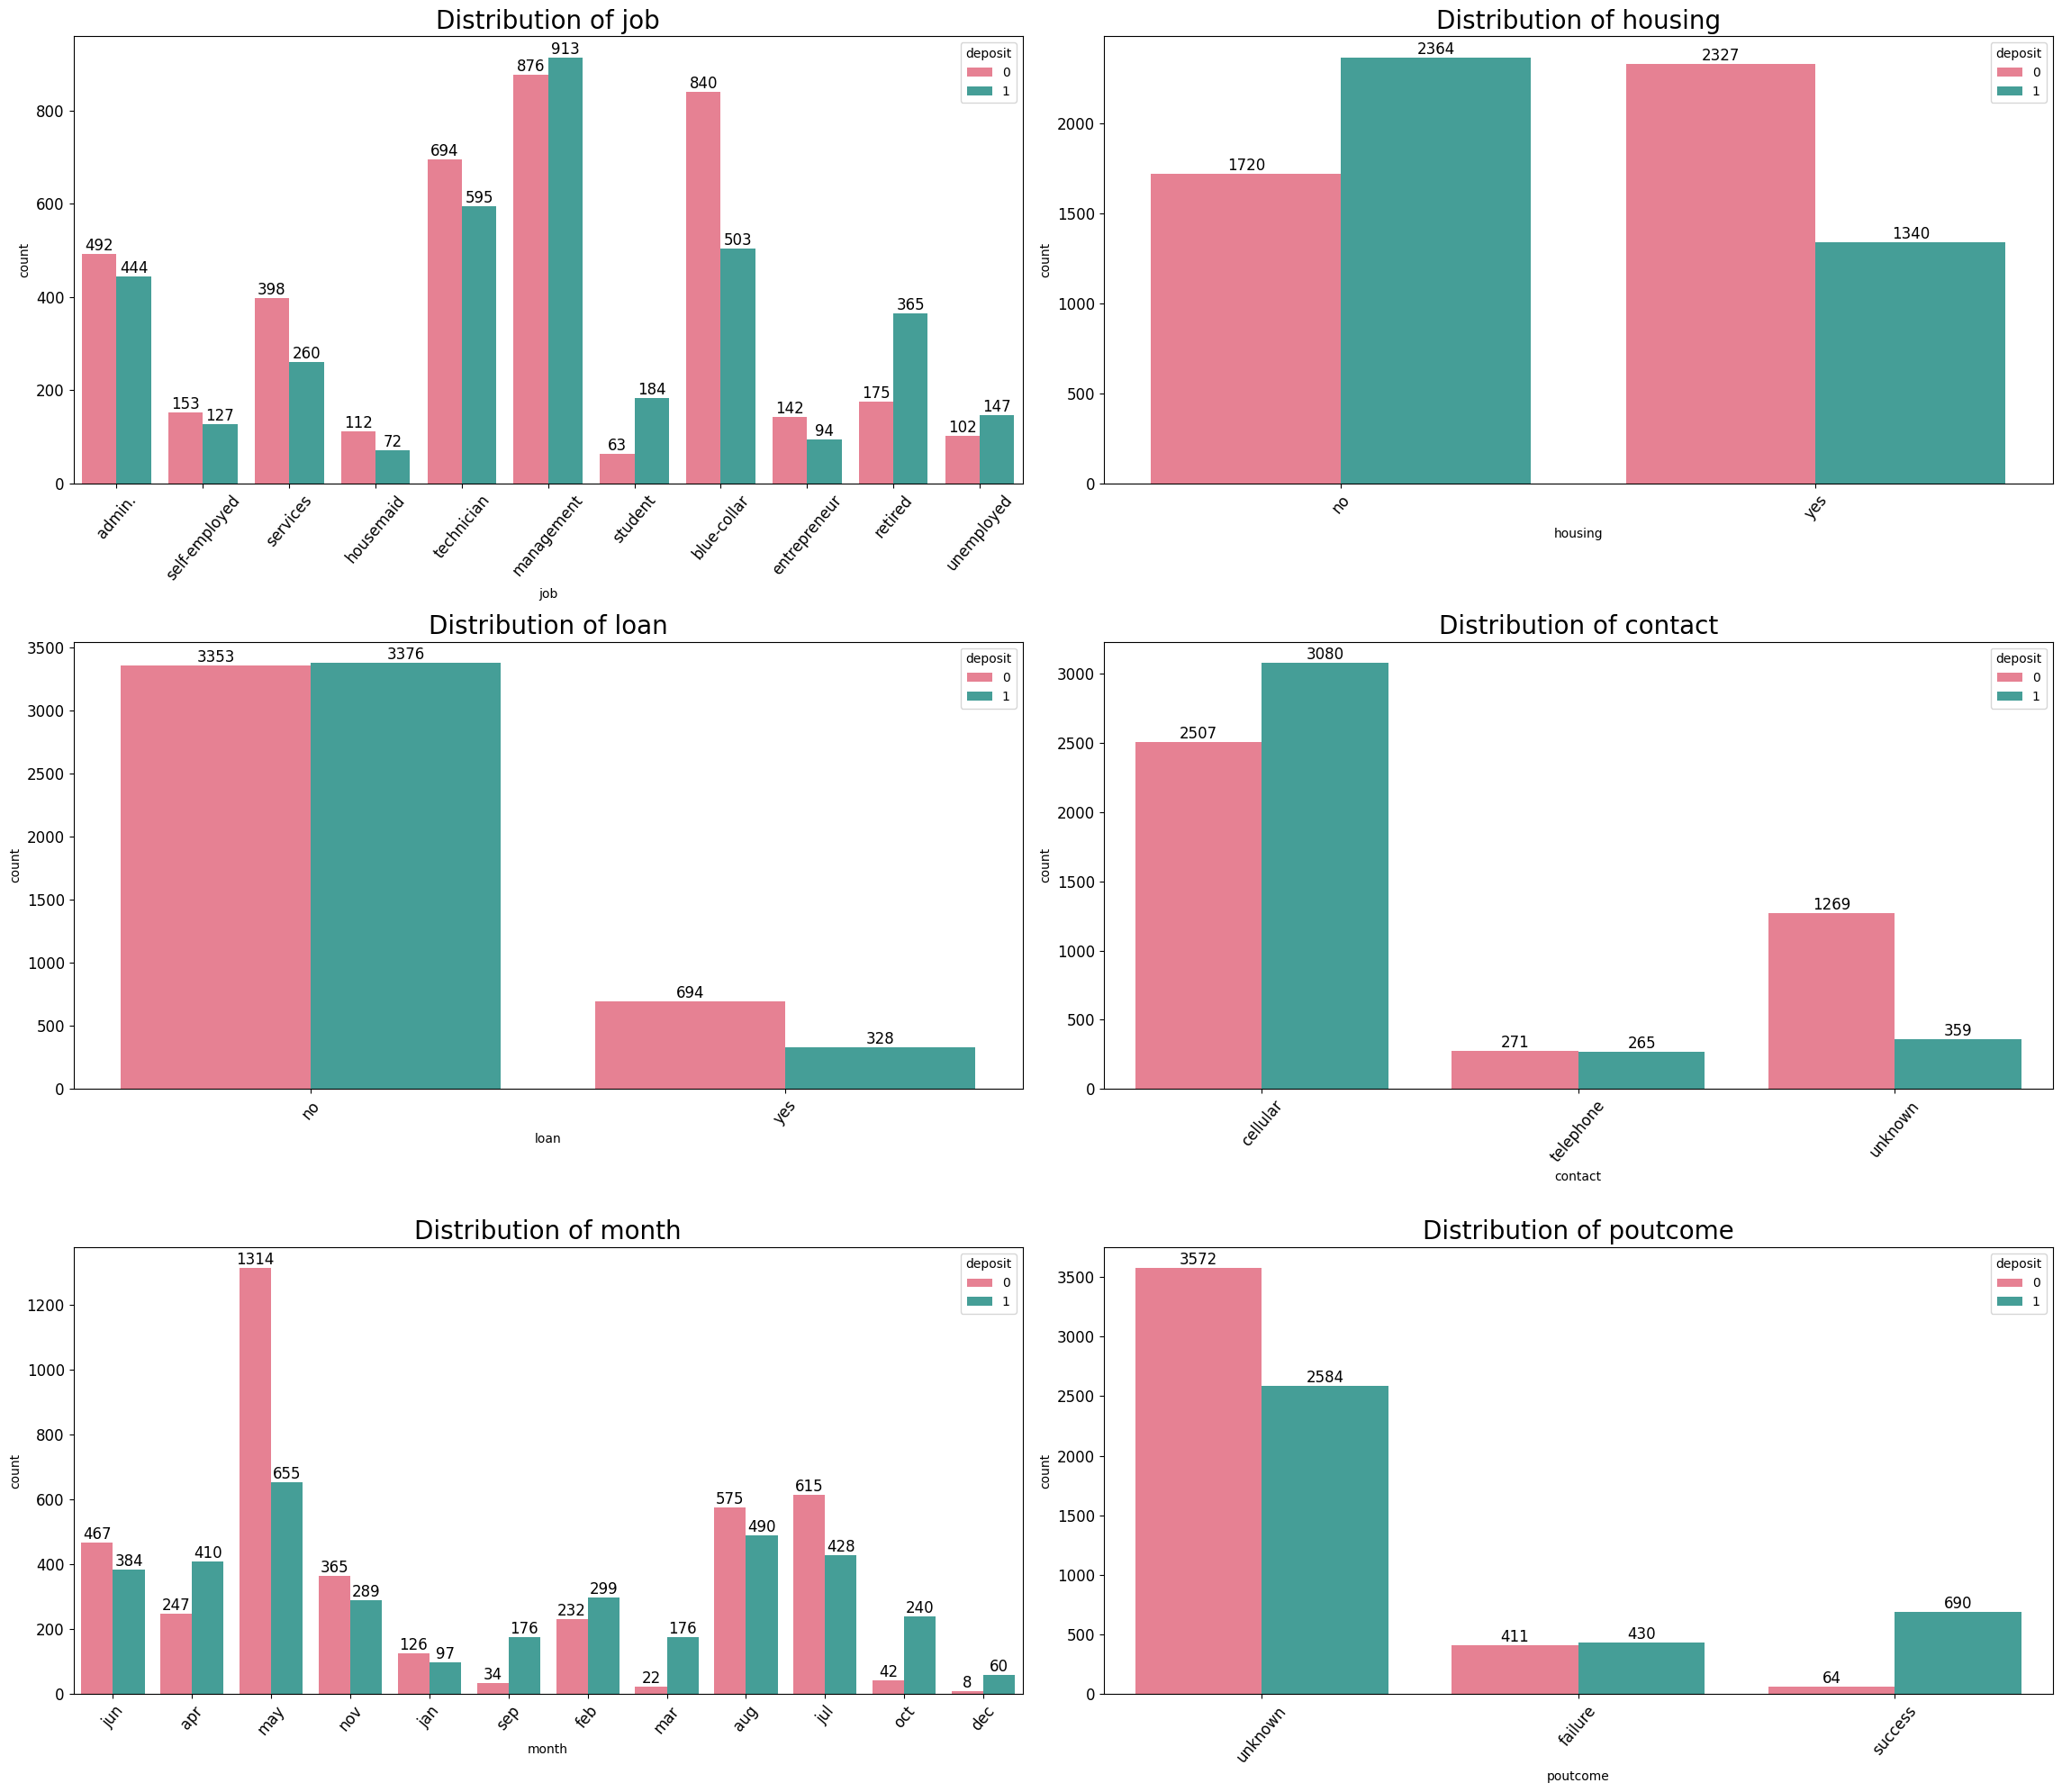

In [209]:
plt.figure(figsize=(23,20))

for i, cols in enumerate(cat_cols):
    plt.subplot(3, 2, i+1)
    ax = sns.countplot(data=df, x=cols, hue="deposit", palette="husl")
    for bars in ax.containers:
        ax.bar_label(bars, fontsize=12)  
    plt.title(f"Distribution of {cols}", fontsize=20)  
    plt.xticks(rotation=50, fontsize=12)  
    plt.yticks(fontsize=12)  

plt.tight_layout()
plt.show()

Inasight :
- Berdasarkan Distribution dari job, pekerjaan dengan role manajemen memiliki nilai yang tinggi dibandingkan role job yang lainnya untuk deposit, hal ini juga sebanding dengan distribusi role pekerjaan manajer untuk yang tidak deposit
- Berdasarkan Distribusi kepemilikan rumah (housing) dapat dilihat bahwa persebaran nasabah yang tidak memiliki rumah cenderung untuk deposit, sementara nasabah yang memiliki rumah cenderung banyak untuk tidak deposit
- Berdasarkan distribusi dari nasaabah yang memiliki pinjaman, dapat dilihat bahwa nasabah yang tidak memiliki pinjaman cenderung banyak yang deposit dan tidak deposit
- Berdasarkan Distribusi contact, dapat dilihat bahwa nasabah yang dihubungi menggunakan celluler cenderung banyak untuk deposit dan tidak deposit
- Berdasarkan distribusi month, nasabah paling banyak tidak melakukan deposit pada bulan may, sedangkam untuk nasabah yang deposit juga paling banyak pada bulan may
- Berdasarkan distribusi poutcome,dapat dilihat nilai unknown memiliki persebaran paling banyak untuk nasabah melakukan deposit dan nasabah yang tidak melakukan deposit

**EDA Numerik Columns**

In [210]:
# Memilih kolom-kolom numerik dan target
num_cols = ['age', 'balance', 'campaign', 'pdays']
target_col = 'deposit'

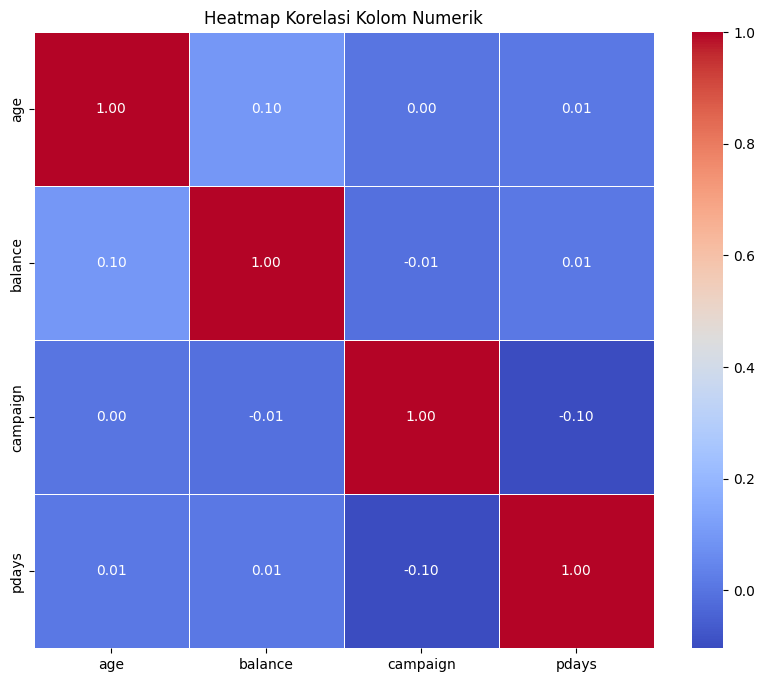

In [361]:
corr_matrix = df[num_cols].corr()

# Membuat heatmap
plt.figure(figsize=(10, 8))  
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi Kolom Numerik')
plt.show()

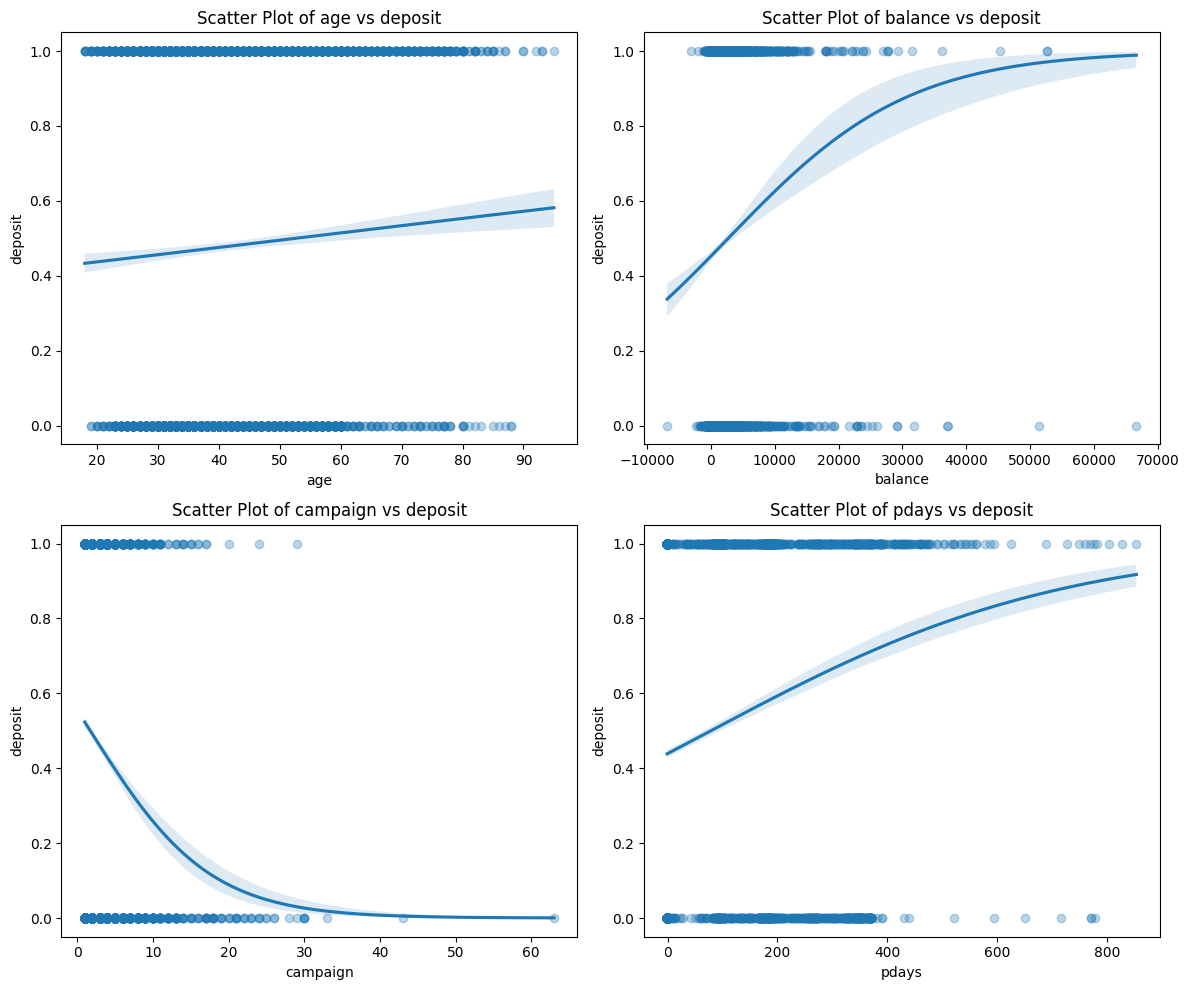

In [211]:
# Memilih kolom-kolom numerik dan target
num_cols = ['age', 'balance', 'campaign', 'pdays']
target_col = 'deposit'

# Membuat subplot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Loop untuk membuat scatter plot dan menambahkan garis regresi
for i, col in enumerate(num_cols):
    row = i // 2
    col_idx = i % 2  # Menggunakan variabel terpisah untuk indeks kolom
    sns.regplot(x=col, y=target_col, data=df, logistic=True, ax=axes[row, col_idx], scatter_kws={'alpha':0.3})
    axes[row, col_idx].set_title(f'Scatter Plot of {col} vs {target_col}')
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel(target_col)

plt.tight_layout()
plt.show()

## **Define Feature(x) dan Target(y)**

In [212]:
x = df.drop(columns='deposit')
x

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown
2,51,admin.,3025,no,no,cellular,may,1,352,unknown
3,38,services,-87,yes,no,cellular,may,1,-1,unknown
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown
...,...,...,...,...,...,...,...,...,...,...
7807,33,management,0,yes,yes,cellular,may,2,-1,unknown
7808,62,housemaid,2,no,no,cellular,nov,1,-1,unknown
7809,48,housemaid,5473,no,no,cellular,feb,2,184,success
7811,31,admin.,54,yes,no,cellular,nov,1,-1,unknown


In [213]:
y = df['deposit']
y

0       1
1       1
2       1
3       0
4       0
       ..
7807    0
7808    1
7809    1
7811    0
7812    1
Name: deposit, Length: 7751, dtype: int64

## **Data Splitting**

In [214]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=0,
                                                    stratify=y)

## **Data Preprocessing**

1. Binning :
    - bining : age, balance , campaign

2. Encoding
    - Onehot Encoding : housing, loan, contact, poutcome
    - Binary encoding : job, month
3. Scaling
    - robust scaler : Age


In [215]:
pipe_binning = Pipeline([('bin_one', KBinsDiscretizer(strategy='uniform', n_bins= 5, encode='onehot'))]) 

1. Binning data outliers menjadi strategi yang penting dalam pengelolaan data yang efektif, terutama dalam analisis data yang sensitif terhadap keberadaan outliers. Dengan memasukkan outliers ke dalam bin terpisah, dapat mengurangi dampaknya terhadap analisis statistik dan model prediktif. Ini membantu mempertahankan integritas analisis data dan hasil yang lebih konsisten.
2. Encoding
3. Scalling

In [216]:
transformer = ColumnTransformer([
    ('pipe_binning', pipe_binning, ['age', 'balance', 'campaign']),
    ('onehot', OneHotEncoder(), ['housing', 'loan', 'contact', 'poutcome']),
    ('binary', BinaryEncoder(), ['job', 'month']),
    ('robust', RobustScaler(), ['pdays'])  
], remainder='passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipe_binning',
                                 Pipeline(steps=[('bin_one',
                                                  KBinsDiscretizer(strategy='uniform'))]),
                                 ['age', 'balance', 'campaign']),
                                ('onehot', OneHotEncoder(),
                                 ['housing', 'loan', 'contact', 'poutcome']),
                                ('binary', BinaryEncoder(), ['job', 'month']),
                                ('robust', RobustScaler(), ['pdays'])])

ColumnTransformer membantu mengelola data prapemrosesan dengan lebih efisien, memungkinkan pendekatan prapemrosesan data yang lebih bersih dan terorganisir. Dengan menerapkan transformasi spesifik ke berbagai subkumpulan fitur, memastikan data berada dalam format yang sesuai untuk model pembelajaran mesin

In [217]:
list_item = []
for col in x.columns:
    list_item.append([col,x[col].nunique(),x[col].unique()])

tabel_desc = pd.DataFrame(columns=['Nama Kolom','Jumlah Unique Value','Unique Values'],data=list_item)
tabel_desc

,Nama Kolom,Jumlah Unique Value,Unique Values
0,age,75,"[55, 39, 51, 38, 36, 41, 37, 35, 57, 23, 33, 31, 53, 30, 46, 48, 25, 29, 28, 52, 49, 44, 42, 27, 47, 64, 26, 34, 56, 32, 58, 45, 54, 50, 79, 65, 40, 24, 60, 43, 61, 59, 62, 68, 82, 71, 73, 76, 69, 20, 72, 22, 67, 19, 70, 75, 63, 93, 77, 80, 66, 21, 87, 81, 92, 88, 84, 83, 78, 74, 18, 85, 95, 86, 90]"
1,job,11,"[admin., self-employed, services, housemaid, technician, management, student, blue-collar, entrepreneur, retired, unemployed]"
2,balance,3141,"[1662, -3058, 3025, -87, 205, -76, 4803, 911, 805, 0, 1234, 1107, 1170, 341, 4808, 88, 169, 863, 242, 2597, 4929, 277, 1438, 15, 3733, 204, 1684, 1025, 55, 19, 348, 785, 742, 511, 6651, 1612, 555, 54, 1185, 110, 950, 412, 228, 367, 3993, 2599, 3528, 32, 551, 3161, 533, 8725, 349, 514, 2688, -194, 154, 874, 2, 5953, 1269, -327, 235, 7, 2661, 1948, 20, 502, 193, 13658, 1716, 172, 1667, 157, 8, 951, 427, 241, 469, 2060, 7177, 655, -114, 588, -971, 4570, 250, 131, 93, 22, 15341, 190, -124, 2228, -60, 376, 855, 4151, 1008, 726, ...]"
3,housing,2,"[no, yes]"
4,loan,2,"[no, yes]"
5,contact,3,"[cellular, telephone, unknown]"
6,month,12,"[jun, apr, may, nov, jan, sep, feb, mar, aug, jul, oct, dec]"
7,campaign,32,"[2, 3, 1, 4, 5, 6, 7, 30, 8, 9, 11, 14, 10, 28, 63, 12, 24, 17, 15, 18, 19, 13, 21, 23, 22, 33, 16, 25, 26, 20, 29, 43]"
8,pdays,421,"[-1, 352, 21, 91, 186, 263, 96, 355, 294, 412, 89, 114, 276, 93, 175, 57, 323, 156, 86, 95, 271, 182, 289, 334, 269, 309, 144, 183, 417, 138, 254, 337, 171, 389, 87, 170, 165, 372, 247, 98, 196, 469, 272, 104, 63, 587, 336, 145, 130, 28, 202, 324, 147, 94, 328, 420, 179, 90, 81, 160, 298, 356, 357, 267, 430, 52, 181, 365, 237, 330, 103, 374, 75, 133, 321, 204, 782, 266, 197, 270, 318, 349, 187, 359, 490, 192, 227, 100, 168, 177, 251, 301, 350, 92, 184, 345, 290, 199, 333, 169, ...]"
9,poutcome,3,"[unknown, failure, success]"


## **Cross Validation**

Dengan menentukan dan menguji beberapa algoritme, dapat membandingkan performanya dan memilih algoritme yang paling sesuai untuk tugas spesifik. Dengan memilih model terbaik untuk kumpulan data, hal ini meningkatkan peluang untuk membangun model prediksi yang akurat dan andal.

1. Regresi Logistik: Algoritme klasifikasi biner yang memprediksi probabilitas suatu instance termasuk dalam kelas tertentu.
2. K-Nearest Neighbors (KNN): Algoritme berbasis instance yang memprediksi kelas instance baru berdasarkan tetangga terdekatnya di set pelatihan.
3. Decisiontree: Algoritma yang membagi data berdasarkan nilai fitur untuk membuat struktur seperti pohon untuk klasifikasi.
4. Random Forest: Metode ansambel yang membangun beberapa pohon keputusan dan menggabungkan prediksinya untuk meningkatkan akurasi.
5. AdaBoost: Menciptakan pembelajar yang kuat dengan secara berurutan berfokus pada sampel yang salah klasifikasi di setiap iterasi.
6. Stacking: Stacking adalah metode ansambel di mana beberapa model individu digunakan untuk membuat prediksi yang kemudian digunakan sebagai fitur masukan untuk model meta. Model meta kemudian digunakan untuk membuat prediksi akhir. Ini memungkinkan model-model yang berbeda dengan kekuatan dan kelemahan yang berbeda untuk bekerja bersama-sama, meningkatkan kinerja keseluruhan.
7. Voting: Voting adalah metode ansambel di mana beberapa model individu memberikan prediksi mereka, dan prediksi final diperoleh dengan cara voting (mis., mayoritas). Terdapat dua jenis voting: Hard voting, di mana prediksi kelas dilakukan oleh mayoritas model, dan Soft voting, di mana prediksi adalah probabilitas rata-rata dari semua model. Voting adalah cara yang efektif untuk menggabungkan prediksi dari beberapa model yang berbeda untuk mendapatkan hasil akhir yang lebih stabil dan akurat.
8. Gradienboosting : Membangun model secara berurutan, masing-masing mengoreksi kesalahan model sebelumnya, untuk meminimalkan fungsi kerugian dan 
meningkatkan akurasi prediksi.
9. XGBoost: Pustaka peningkatan gradien terdistribusi yang dioptimalkan yang dirancang untuk pelatihan model pembelajaran mesin yang efisien dan skalabel. Ini adalah metode pembelajaran ansambel yang menggabungkan prediksi beberapa model lemah untuk menghasilkan prediksi yang lebih kuat.

In [218]:
# Create machine learning models for cross-validation.
# define model logreg
logreg = LogisticRegression(random_state=0)

#define model knn
knn = KNeighborsClassifier()

#define model dtree
dtree = DecisionTreeClassifier(random_state=0)

# define voting
voting = VotingClassifier(estimators=[('clf1', logreg),
                             ('clf2', knn),
                             ('clf3', dtree)])  # base learner

# define stacking
stacking = StackingClassifier(estimators=[('clf1', logreg),
                               ('clf2', knn),
                               ('clf3', dtree)], # base learner
                              final_estimator=logreg) # meta learner

# define model random forest
rf = RandomForestClassifier(random_state=0)

# define model adaboost
adaboost = AdaBoostClassifier(random_state=0)

# define model grad boost
gboost = GradientBoostingClassifier(random_state=0)

# define model xgboost
xgboost = XGBClassifier()

**Sekarang, mari coba menemukan model dasar terbaik dengan menggunakan cross valaidation.**

**Metric Scoring yang di gunakan adalah “Recall”. Hal ini digunakan karena berdasarkan permasalahan bisnis, aspek False Negative perlu diminimalkan. Oleh karena itu, perlu menggunakan Recall untuk meminimalkan False Negative.**

In [219]:
# Model Selection

models = [logreg, knn, dtree, voting, stacking, rf, adaboost, gboost, xgboost]


cv_mean = []
cv_std = []
cv_all = []

# Mencari model terbaik berdasarkan recall score terbesar dan std terkecil
for model in models:

    model_pipe = Pipeline([
        ('transformer', transformer),
        ('model', model)])
    
    model_cv = cross_val_score(
        estimator=model_pipe, 
        X= x_train, 
        y= y_train, 
        cv = 5, 
        scoring= 'recall',
        )

    cv_mean.append(model_cv.mean())
    cv_std.append(model_cv.std())
    cv_all.append(model_cv.round(4))

In [220]:
df_cv = pd.DataFrame({
    'model': models,
    'mean': cv_mean,
    'std': cv_std
})

df_cv


,model,mean,std
0,LogisticRegression(random_state=0),0.602085,0.019925
1,KNeighborsClassifier(),0.585223,0.026406
2,DecisionTreeClassifier(random_state=0),0.536959,0.028438
3,"VotingClassifier(estimators=[('clf1', LogisticRegression(random_state=0)),\n ('clf2', KNeighborsClassifier()),\n ('clf3', DecisionTreeClassifier(random_state=0))])",0.578128,0.023555
4,"StackingClassifier(estimators=[('clf1', LogisticRegression(random_state=0)),\n ('clf2', KNeighborsClassifier()),\n ('clf3',\n DecisionTreeClassifier(random_state=0))],\n final_estimator=LogisticRegression(random_state=0))",0.600737,0.028354
5,RandomForestClassifier(random_state=0),0.592975,0.034556
6,AdaBoostClassifier(random_state=0),0.612886,0.020464
7,GradientBoostingClassifier(random_state=0),0.593982,0.025805
8,"XGBClassifier(base_score=None, booster=None, callbacks=None,\n colsample_bylevel=None, colsample_bynode=None,\n colsample_bytree=None, device=None, early_stopping_rounds=None,\n enable_categorical=False, eval_metric=None, feature_types=None,\n gamma=None, grow_policy=None, importance_type=None,\n interaction_constraints=None, learning_rate=None, max_bin=None,\n max_cat_threshold=None, max_cat_to_onehot=None,\n max_delta_step=None, max_depth=None, max_leaves=None,\n min_child_weight=None, missing=nan, monotone_constraints=None,\n multi_strategy=None, n_estimators=None, n_jobs=None,\n num_parallel_tree=None, random_state=None, ...)",0.589603,0.028576


Setelah dilakukan nilai cross validation nilai mean tertinggi dan standar deviasi yang rendah  yaitu menggunakan model Adaboostclassifier, selanjutnya model ini akan digunakan untuk analisis lebih lanjut

## **Hyperparameter Tunning**

**Tuning 1**

In [221]:
# Definisikan model Adaboost
model = AdaBoostClassifier(estimator=DecisionTreeClassifier())

hyperparameter = {                                             
    'modeling__n_estimators': range(50, 101, 10),
    'modeling__estimator__max_depth' : range(2,10,2),
    'modeling__estimator__min_samples_split' : range(2, 100, 10),
    'modeling__estimator__min_samples_leaf' : range(2, 100,10),
    'modeling__learning_rate': [0.1, 0.5, 1.0],
    'modeling__algorithm': ['SAMME', 'SAMME.R'],
    'modeling__random_state': [0]
}

# Pipeline
pipe_model = Pipeline([                                        
    ('preprocessing', transformer),                            
    ('modeling', model)                                         
])

# Utilize 5-fold cross validation with recall as perfomance metrics in grids
# gridsearch = GridSearchCV(
#     estimator=pipe_model, 
#     param_grid = hyperparameter, 
#     cv=5,  
#     n_jobs=-1, 
#     scoring= 'recall'
# )

randomsearch = RandomizedSearchCV(
    estimator=pipe_model, 
    param_distributions= hyperparameter, 
    cv=5,
    n_iter=100,
    n_jobs=-1, 
    scoring= 'recall'
)


In [222]:
# Fit randomsearch to X_train, y_train
randomsearch.fit(x_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('pipe_binning',
                                                                               Pipeline(steps=[('bin_one',
                                                                                                KBinsDiscretizer(strategy='uniform'))]),
                                                                               ['age',
                                                                                'balance',
                                                                                'campaign']),
                                                                              ('onehot',
                                                                               OneHotEncoder(),
                                                                               ['housing',
                                                                                'loan',
                                                                                'contact',
                                                                                'poutcome']),
                                                                              ('binary',
                                                                               BinaryEncoder(),
                                                                               ['job',
                                                                                'month']),
                                                                              ('ro...
                   param_distributions={'modeling__algorithm': ['SAMME',
                                                                'SAMME.R'],
                                        'modeling__estimator__max_depth': range(2, 10, 2),
                                        'modeling__estimator__min_samples_leaf': range(2, 100, 10),
                                        'modeling__estimator__min_samples_split': range(2, 100, 10),
                                        'modeling__learning_rate': [0.1, 0.5,
                                                                    1.0],
                                        'modeling__n_estimators': range(50, 101, 10),
                                        'modeling__random_state': [0]},
                   scoring='recall')

In [223]:
randomsearch.best_score_

0.6189656351123467

**Tuning 2**

In [224]:
# Definisikan model Adaboost
model = AdaBoostClassifier(estimator=DecisionTreeClassifier())

# Hyperparameter grid
hyperparameter = {                                             
    'modeling__n_estimators': range(20, 201, 10),
    'modeling__estimator__max_depth' : range(2,10,2),
    'modeling__estimator__min_samples_split' : range(2, 100, 10),
    'modeling__estimator__min_samples_leaf' : range(2, 100,10),
    'modeling__learning_rate': [0.1, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'modeling__algorithm': ['SAMME', 'SAMME.R'],
    'modeling__random_state': [0]
}

# Pipeline
pipe_model = Pipeline([                                        
    ('preprocessing', transformer),                            
    ('modeling', model)                                         
])

# Utilize 5-fold cross validation with recall as perfomance metrics in grids
# gridsearch2 = GridSearchCV(
#     estimator=pipe_model, 

#     param_grid = hyperparameter, 
#     cv=5,  
#     n_jobs=-1, 
#     scoring= 'recall'
# )

randomsearch2 = RandomizedSearchCV(
    estimator=pipe_model, 
    param_distributions= hyperparameter, 
    cv=5,
    n_iter=500,
    n_jobs=-1, 
    scoring= 'recall'
)

In [225]:
# Fit randomsearch to X_train, y_train
randomsearch2.fit(x_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('pipe_binning',
                                                                               Pipeline(steps=[('bin_one',
                                                                                                KBinsDiscretizer(strategy='uniform'))]),
                                                                               ['age',
                                                                                'balance',
                                                                                'campaign']),
                                                                              ('onehot',
                                                                               OneHotEncoder(),
                                                                               ['housing',
                                                                                'loan',
                                                                                'contact',
                                                                                'poutcome']),
                                                                              ('binary',
                                                                               BinaryEncoder(),
                                                                               ['job',
                                                                                'month']),
                                                                              ('ro...
                   param_distributions={'modeling__algorithm': ['SAMME',
                                                                'SAMME.R'],
                                        'modeling__estimator__max_depth': range(2, 10, 2),
                                        'modeling__estimator__min_samples_leaf': range(2, 100, 10),
                                        'modeling__estimator__min_samples_split': range(2, 100, 10),
                                        'modeling__learning_rate': [0.1, 0.5,
                                                                    0.6, 0.7,
                                                                    0.8, 0.9,
                                                                    1.0],
                                        'modeling__n_estimators': range(20, 201, 10),
                                        'modeling__random_state': [0]},
                   scoring='recall')

In [226]:
randomsearch2.best_score_

0.6547342874071373

In [227]:
randomsearch2.best_params_

{'modeling__random_state': 0,
 'modeling__n_estimators': 30,
 'modeling__learning_rate': 0.1,
 'modeling__estimator__min_samples_split': 92,
 'modeling__estimator__min_samples_leaf': 42,
 'modeling__estimator__max_depth': 2,
 'modeling__algorithm': 'SAMME'}

In [228]:
randomsearch2.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipe_binning',
                                                  Pipeline(steps=[('bin_one',
                                                                   KBinsDiscretizer(strategy='uniform'))]),
                                                  ['age', 'balance',
                                                   'campaign']),
                                                 ('onehot', OneHotEncoder(),
                                                  ['housing', 'loan', 'contact',
                                                   'poutcome']),
                                                 ('binary', BinaryEncoder(),
                                                  ['job', 'month']),
                                                 ('robust', RobustScaler(),
                                                  ['pdays'])])),
                ('modeling',
                 AdaBoostClassifier(algorithm='SAMME',
                                    estimator=DecisionTreeClassifier(max_depth=2,
                                                                     min_samples_leaf=42,
                                                                     min_samples_split=92),
                                    learning_rate=0.1, n_estimators=30,
                                    random_state=0))])

In [229]:
pd.DataFrame(randomsearch.cv_results_).sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_modeling__random_state,param_modeling__n_estimators,param_modeling__learning_rate,param_modeling__estimator__min_samples_split,param_modeling__estimator__min_samples_leaf,param_modeling__estimator__max_depth,param_modeling__algorithm,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
55,0.766533,0.042938,0.064616,0.004719,0,50,0.1,32,72,2,SAMME.R,"{'modeling__random_state': 0, 'modeling__n_estimators': 50, 'modeling__learning_rate': 0.1, 'modeling__estimator__min_samples_split': 32, 'modeling__estimator__min_samples_leaf': 72, 'modeling__estimator__max_depth': 2, 'modeling__algorithm': 'SAMME.R'}",0.620573,0.602024,0.639123,0.613176,0.619932,0.618966,0.012086,1
99,0.755499,0.092205,0.073736,0.014334,0,50,0.1,92,2,2,SAMME.R,"{'modeling__random_state': 0, 'modeling__n_estimators': 50, 'modeling__learning_rate': 0.1, 'modeling__estimator__min_samples_split': 92, 'modeling__estimator__min_samples_leaf': 2, 'modeling__estimator__max_depth': 2, 'modeling__algorithm': 'SAMME.R'}",0.627319,0.568297,0.644182,0.587838,0.630068,0.611541,0.028599,2
22,2.227249,0.073501,0.102022,0.020606,0,90,0.5,12,42,8,SAMME,"{'modeling__random_state': 0, 'modeling__n_estimators': 90, 'modeling__learning_rate': 0.5, 'modeling__estimator__min_samples_split': 12, 'modeling__estimator__min_samples_leaf': 42, 'modeling__estimator__max_depth': 8, 'modeling__algorithm': 'SAMME'}",0.615514,0.581788,0.642496,0.577703,0.636824,0.610865,0.026986,3
79,1.348889,0.062323,0.080967,0.013203,0,80,0.5,82,32,4,SAMME,"{'modeling__random_state': 0, 'modeling__n_estimators': 80, 'modeling__learning_rate': 0.5, 'modeling__estimator__min_samples_split': 82, 'modeling__estimator__min_samples_leaf': 32, 'modeling__estimator__max_depth': 4, 'modeling__algorithm': 'SAMME'}",0.622260,0.571669,0.634064,0.570946,0.621622,0.604112,0.027150,4
74,0.930624,0.081405,0.070367,0.003064,0,60,0.1,2,32,2,SAMME.R,"{'modeling__random_state': 0, 'modeling__n_estimators': 60, 'modeling__learning_rate': 0.1, 'modeling__estimator__min_samples_split': 2, 'modeling__estimator__min_samples_leaf': 32, 'modeling__estimator__max_depth': 2, 'modeling__algorithm': 'SAMME.R'}",0.607083,0.573356,0.637437,0.584459,0.611486,0.602764,0.022346,5


## **Predict to test set**

**Before Tunning**

In [230]:
# Modeling

# Model
model = AdaBoostClassifier(random_state=0)

# Pipeline
pipe_model = Pipeline([
    ('prep', transformer),
    ('modeling', model)
])

# Fit
pipe_model.fit(x_train, y_train)

# Predict
y_pred_before= pipe_model.predict(x_test)

# Scoring 
print('Recall Score =', recall_score(y_test, y_pred_before))

Recall Score = 0.5951417004048583


**After Tunning 1**

In [231]:
# Modeling

# Model
best_model = randomsearch.best_estimator_

# fit
best_model.fit(x_train, y_train)

# Predict
y_pred_after= best_model.predict(x_test)

# Scoring 
print('Recall Score =', recall_score(y_test, y_pred_after))

Recall Score = 0.6329284750337382


**After Tunning 2**

In [232]:
# Modeling

# Model
best_model = randomsearch2.best_estimator_

# fit
best_model.fit(x_train, y_train)

# Predict
y_pred_after2= best_model.predict(x_test)

# Scoring 
print('Recall Score =', recall_score(y_test, y_pred_after2))

Recall Score = 0.6545209176788124


Setelah dilakukan hyperparamter tunning, nilai recall selalu meningkat
- model benchmark, Recall Score = 0.5951417004048583
- setelah tuning 1,  Recall Score = 0.6329284750337382
- setelah tuning 2,  Recall Score = 0.6545209176788124

In [233]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

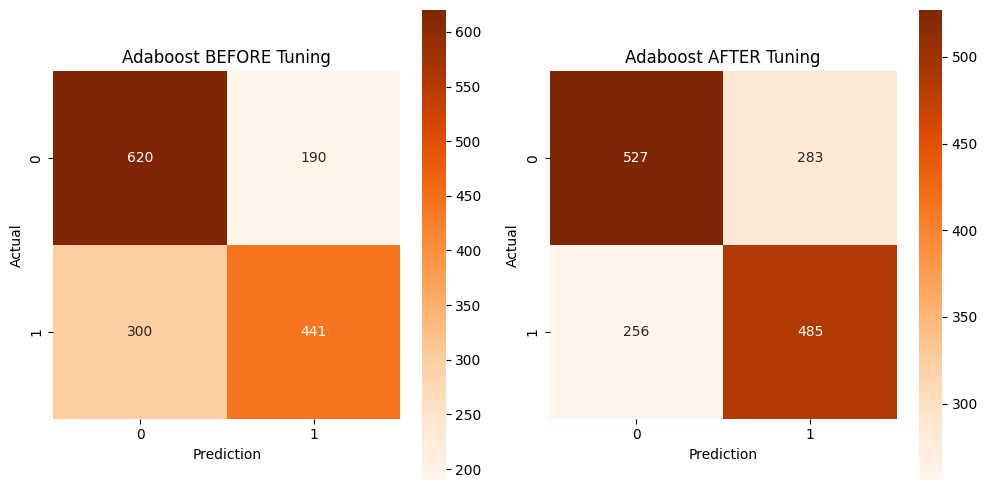

In [234]:
plt.figure(figsize=(15,5))

# Model Decision Tree sebelum tuning
plt.subplot(1,3,1)
sns.heatmap(confusion_matrix(y_test, y_pred_before), annot=True, fmt='.0f', square=True, cmap='Oranges')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Adaboost BEFORE Tuning')

# Model XGBoost setelah tuning
plt.subplot(1,3,2)
sns.heatmap(confusion_matrix(y_test, y_pred_after2), annot=True, fmt='.0f', square=True, cmap='Oranges')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Adaboost AFTER Tuning')

plt.tight_layout()
plt.show()

## **Optimized Threshold**

In [235]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

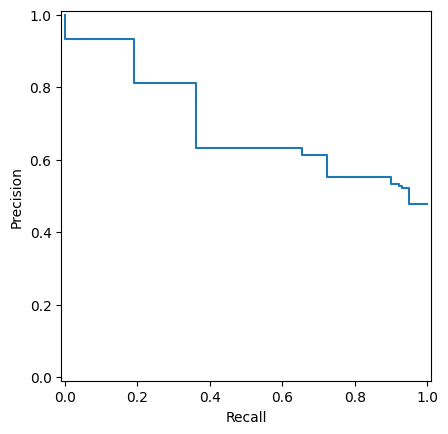

In [236]:
# Best model menggunakan randomsearch
best_model = randomsearch2.best_estimator_

# Predict probabilities
y_test_predict_proba = best_model.predict_proba(x_test)
y_test_predict_proba = y_test_predict_proba[:, 1]

# Menghitung precurve
precision, recall, thresholds = precision_recall_curve(y_test, y_test_predict_proba)

# Membuat pre-curve plot
PrecisionRecallDisplay(precision, recall).plot()
plt.show()

In [280]:
# Mengambil nilai precision, recall dan threshold dari dataframe


df_threshold = pd.DataFrame()
df_threshold['Precision Score'] = precision
df_threshold['Recall Score']  = recall
df_threshold['Threshold Score'] = list(thresholds) + [0]
df_threshold.sort_values('Recall Score', ascending=False)

df_threshold


,Precision Score,Recall Score,Threshold Score
0,0.477756,1.000000,0.119203
1,0.521127,0.948718,0.155024
2,0.527161,0.929825,0.185950
3,0.534011,0.921727,0.236445
4,0.551696,0.900135,0.380982
5,0.612571,0.723347,0.454846
6,0.631510,0.654521,0.509518
7,0.812689,0.363023,0.584761
8,0.934211,0.191633,0.880797
9,1.000000,0.000000,0.000000


In [345]:
# Menggunakan nilai threshold terbaik dari kombinasi nilai recall dan precision yang tertinggi
# Threshold = 0.454846
Threshold = 0.380982
# Memaksimalkan nilai menggunakan threshold
best_model = randomsearch2.best_estimator_

best_model.fit(x_train, y_train)
y_train_predict_proba = best_model.predict_proba(x_train)[:, 1]                     # Predict probability
y_test_predict_proba = best_model.predict_proba(x_test)[:, 1]
y_train_predict_thres = np.where(y_train_predict_proba > Threshold, 1, 0)           # Adjust the threshold using np.where
y_test_predict_thres = np.where(y_test_predict_proba > Threshold, 1, 0)

# Recall Score
recall_score(y_test, y_test_predict_thres)

0.9001349527665317

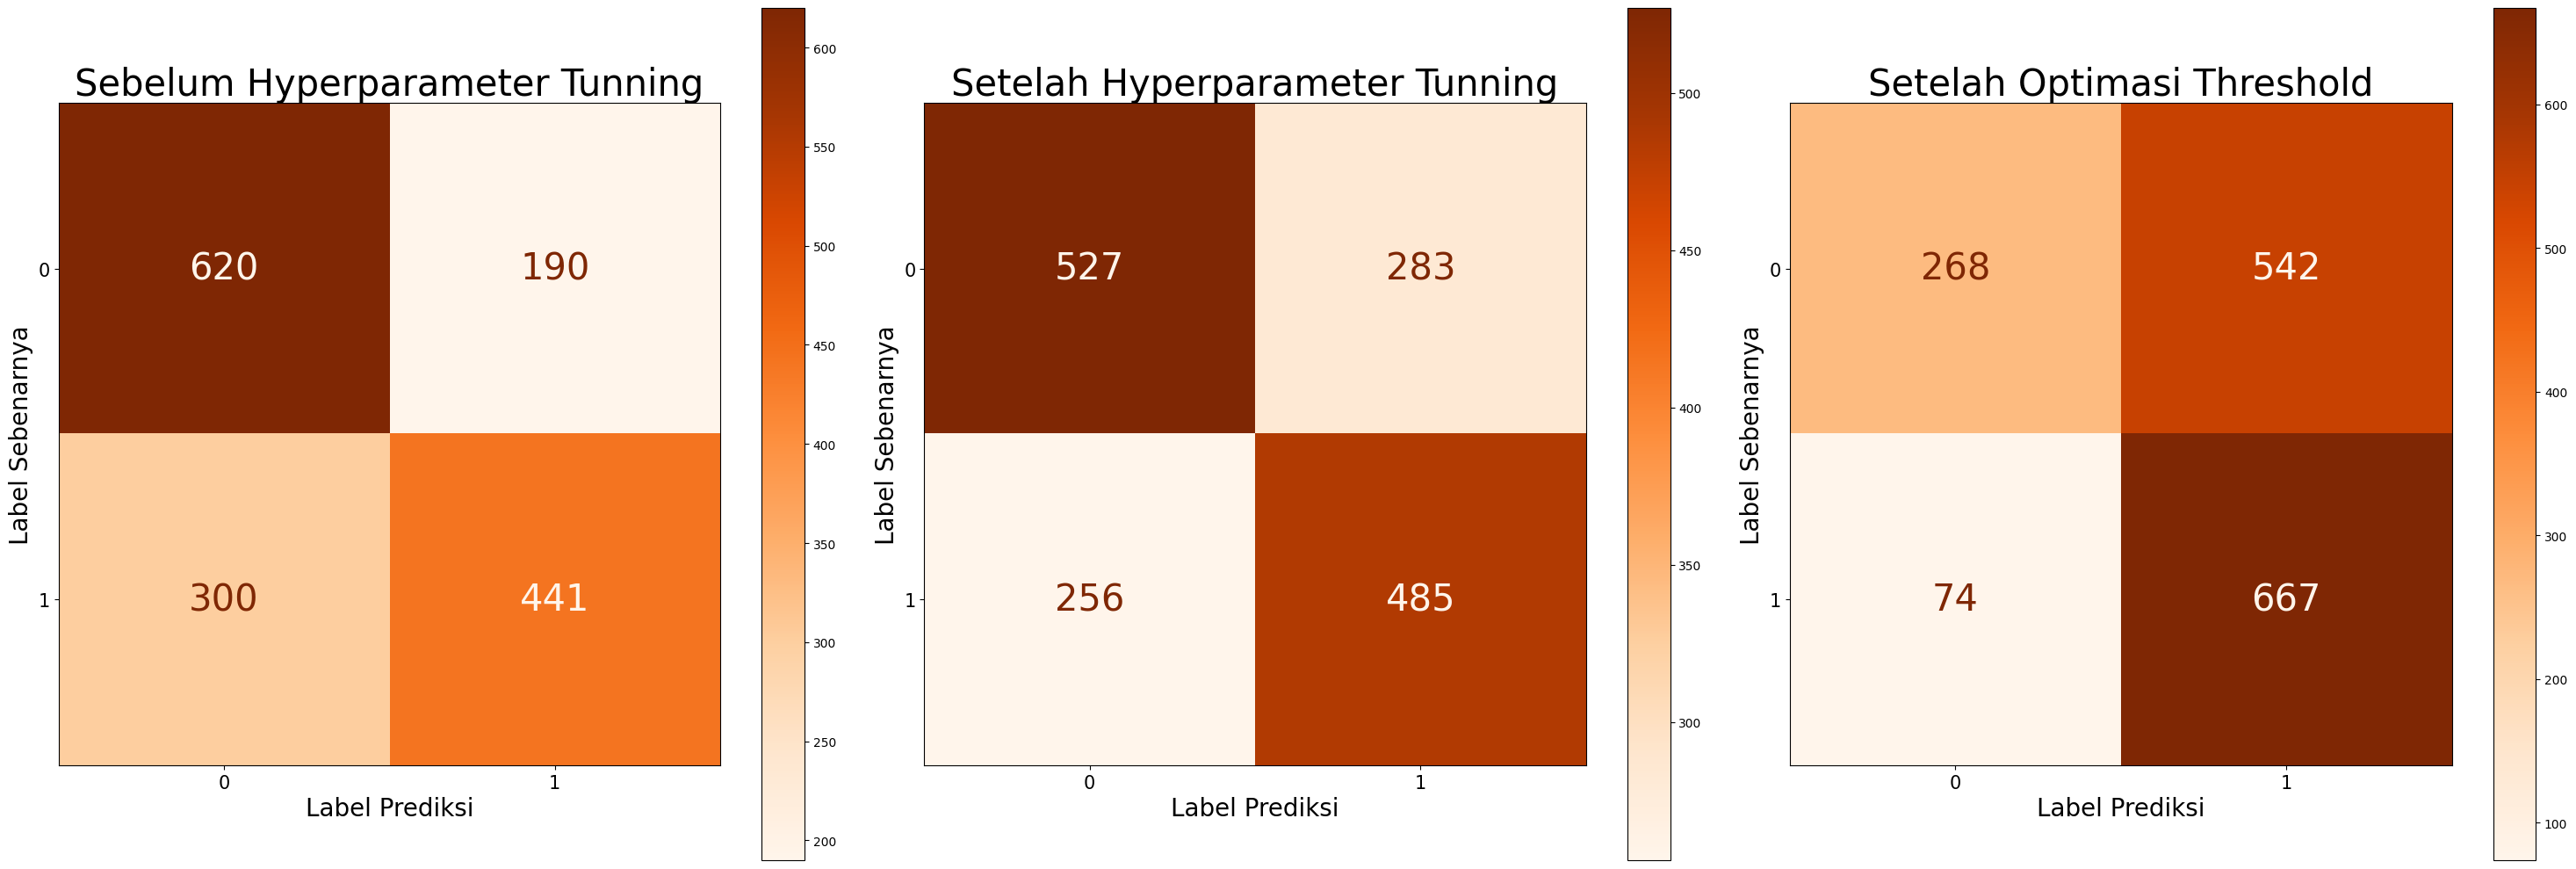

In [346]:
def final_confusion_matrix():                                           
    
    fig, axes = plt.subplots(1, 3, figsize=(30, 10))

    # Menampilkan confusion metrix ke 1
    disp1 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_before))
    disp1.plot(ax=axes[0], cmap='Oranges', text_kw={'size': 30})  # Mengubah Warna
    axes[0].set_xlabel('Label Prediksi', fontsize=20)  # Set label pada sumbu x
    axes[0].tick_params(axis='x', labelsize=15)
    axes[0].set_ylabel('Label Sebenarnya', fontsize=20)  # Set label pada sumbu y
    axes[0].tick_params(axis='y', labelsize=15)
    axes[0].set_title('Sebelum Hyperparameter Tunning', fontsize=30)  # Set judul plot

    # Menampilkan confusion metrix ke 2
    disp2 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_after2))
    disp2.plot(ax=axes[1], cmap='Oranges', text_kw={'size': 30})  # Mengubah Warna
    axes[1].set_xlabel('Label Prediksi', fontsize=20)
    axes[1].tick_params(axis='x', labelsize=15)
    axes[1].set_ylabel('Label Sebenarnya', fontsize=20)
    axes[1].tick_params(axis='y', labelsize=15)
    axes[1].set_title('Setelah Hyperparameter Tunning', fontsize=30)

    # Menampilkan confusion metrix ke 3
    disp3 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_test_predict_thres))
    disp3.plot(ax=axes[2], cmap='Oranges', text_kw={'size': 30})  # Mengubah Warna
    axes[2].set_xlabel('Label Prediksi', fontsize=20)
    axes[2].tick_params(axis='x', labelsize=15)
    axes[2].set_ylabel('Label Sebenarnya', fontsize=20)
    axes[2].tick_params(axis='y', labelsize=15)
    axes[2].set_title('Setelah Optimasi Threshold', fontsize=30)

    plt.tight_layout() 
    plt.show()

final_confusion_matrix()

In [347]:
print('Adaboost BEFORE Tuning')
print(classification_report(y_test, y_pred_before))

print('Adaboost AFTER Tuning')
print(classification_report(y_test, y_pred_after2))

print('Adaboost After THRESHOLD')
print(classification_report(y_test, y_test_predict_thres))

Adaboost BEFORE Tuning
              precision    recall  f1-score   support

           0       0.67      0.77      0.72       810
           1       0.70      0.60      0.64       741

    accuracy                           0.68      1551
   macro avg       0.69      0.68      0.68      1551
weighted avg       0.69      0.68      0.68      1551

Adaboost AFTER Tuning
              precision    recall  f1-score   support

           0       0.67      0.65      0.66       810
           1       0.63      0.65      0.64       741

    accuracy                           0.65      1551
   macro avg       0.65      0.65      0.65      1551
weighted avg       0.65      0.65      0.65      1551

Adaboost After THRESHOLD
              precision    recall  f1-score   support

           0       0.78      0.33      0.47       810
           1       0.55      0.90      0.68       741

    accuracy                           0.60      1551
   macro avg       0.67      0.62      0.57      1551
weig

In [348]:
# Hitung confusion matrix untuk setiap prediksi
cm_before = confusion_matrix(y_test, y_pred_before)
cm_after = confusion_matrix(y_test, y_pred_after2)
cm_thres = confusion_matrix(y_test, y_test_predict_thres)

# Hitung jumlah False Positive (FP) dan False Negative (FN)
fp_before, fn_before = cm_before[0, 1], cm_before[1, 0]
fp_after, fn_after = cm_after[0, 1], cm_after[1, 0]
fp_thres, fn_thres = cm_thres[0, 1], cm_thres[1, 0]

# Hitung kerugian berdasarkan biaya yang diberikan
cost_fp = 500  # biaya untuk false positive
cost_fn = 1500 # biaya untuk false negative

loss_before = (fp_before * cost_fp) + (fn_before * cost_fn)
loss_after = (fp_after * cost_fp) + (fn_after * cost_fn)
loss_thres = (fp_thres * cost_fp) + (fn_thres * cost_fn)


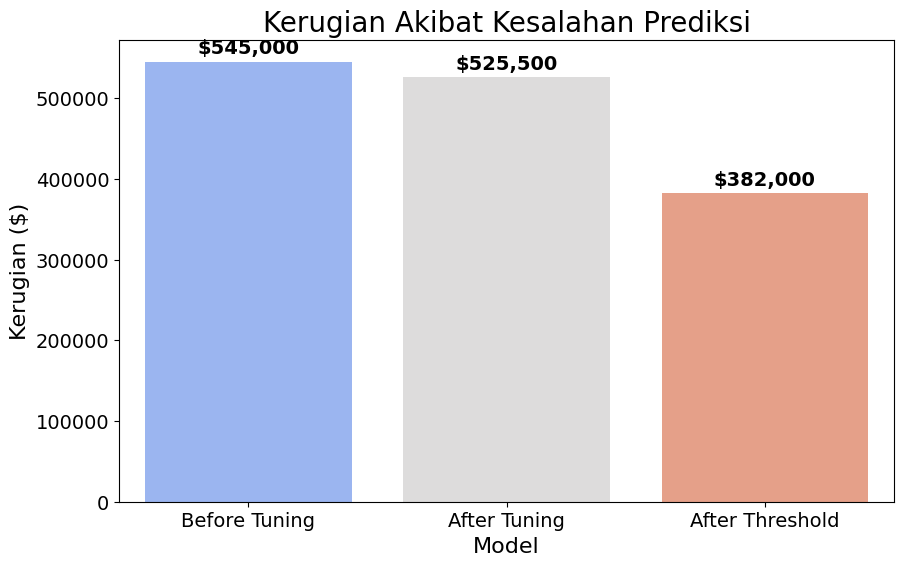

In [349]:
# Buat barplot untuk menampilkan kerugian
losses = [loss_before, loss_after, loss_thres]
labels = ['Before Tuning', 'After Tuning', 'After Threshold']

# Mengatur palet warna
colors = sns.color_palette("coolwarm", 3)

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=labels, y=losses, palette=colors)

# Mengatur judul dan label
plt.title('Kerugian Akibat Kesalahan Prediksi', fontsize=20)
plt.ylabel('Kerugian ($)', fontsize=16)
plt.xlabel('Model', fontsize=16)

# Menambahkan anotasi nilai kerugian di atas setiap batang
for i, loss in enumerate(losses):
    barplot.text(i, loss + 5000, f'${loss:,}', ha='center', va='bottom', fontsize=14, fontweight='bold', color='black')

# Mengatur gaya untuk sumbu
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Tampilkan plot
plt.show()

## **Explainable AI**

1. Feature Importance
2. LIME

In [448]:
my_model = best_model[-1]


In [449]:
best_model['preprocessing']

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipe_binning',
                                 Pipeline(steps=[('bin_one',
                                                  KBinsDiscretizer(strategy='uniform'))]),
                                 ['age', 'balance', 'campaign']),
                                ('onehot', OneHotEncoder(),
                                 ['housing', 'loan', 'contact', 'poutcome']),
                                ('binary', BinaryEncoder(), ['job', 'month']),
                                ('robust', RobustScaler(), ['pdays'])])

In [450]:
best_model['preprocessing'].transformers_[0][1].get_feature_names_out()

array(['age_0.0', 'age_1.0', 'age_2.0', 'age_3.0', 'age_4.0',
       'balance_0.0', 'balance_1.0', 'balance_2.0', 'balance_3.0',
       'balance_4.0', 'campaign_0.0', 'campaign_1.0', 'campaign_2.0',
       'campaign_3.0', 'campaign_4.0'], dtype=object)

In [451]:
pipe_bining = list(best_model['preprocessing'].transformers_[0][1].get_feature_names_out())
one_hot = list(best_model['preprocessing'].transformers_[1][1].get_feature_names_out())
binary = list(best_model['preprocessing'].transformers_[2][1].get_feature_names_out())
robust = list(best_model['preprocessing'].transformers_[3][1].get_feature_names_out())

feat = pipe_bining + one_hot + binary + robust

Mengambil nama semua kolom feature untuk dilakukan visualisasi menggunakan lime

In [452]:
x_test_prep =  pd.DataFrame(best_model[0].transform(x_test), columns=feat)
x_test_prep

,age_0.0,age_1.0,age_2.0,age_3.0,age_4.0,balance_0.0,balance_1.0,balance_2.0,balance_3.0,balance_4.0,...,poutcome_unknown,job_0,job_1,job_2,job_3,month_0,month_1,month_2,month_3,pdays
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.000000
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.000000
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.000000
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.000000
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,2.361446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1546,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.000000
1547,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.000000
1548,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.000000
1549,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,4.216867


In [453]:
# Menampung semua feature dalam list
all_features = []
for transformer in best_model['preprocessing'].transformers_:
    all_features += list(transformer[1].get_feature_names_out())

# cek panjang dari features dan importances
n_features = len(all_features)
importances = best_model['modeling'].feature_importances_

if len(importances) != n_features:
    print(f"Error: The number of features ({n_features}) does not match the number of importances ({len(importances)}).")
else:
    # Membuat dataframe untuk feature importance
    feature_df = pd.DataFrame({
        'importance': importances,
        'features': all_features
    }).sort_values(by='importance', ascending=False).head(n_features)
    
    feature_df.reset_index(drop=True, inplace=True)
    feature_df.index += 1
    

In [454]:
feature_df.head(10)

,importance,features
1,0.687681,poutcome_success
2,0.246779,contact_unknown
3,0.038421,housing_yes
4,0.013651,housing_no
5,0.008847,loan_no
6,0.004622,loan_yes
7,0.000000,contact_telephone
8,0.000000,poutcome_failure
9,0.000000,poutcome_unknown
10,0.000000,job_0


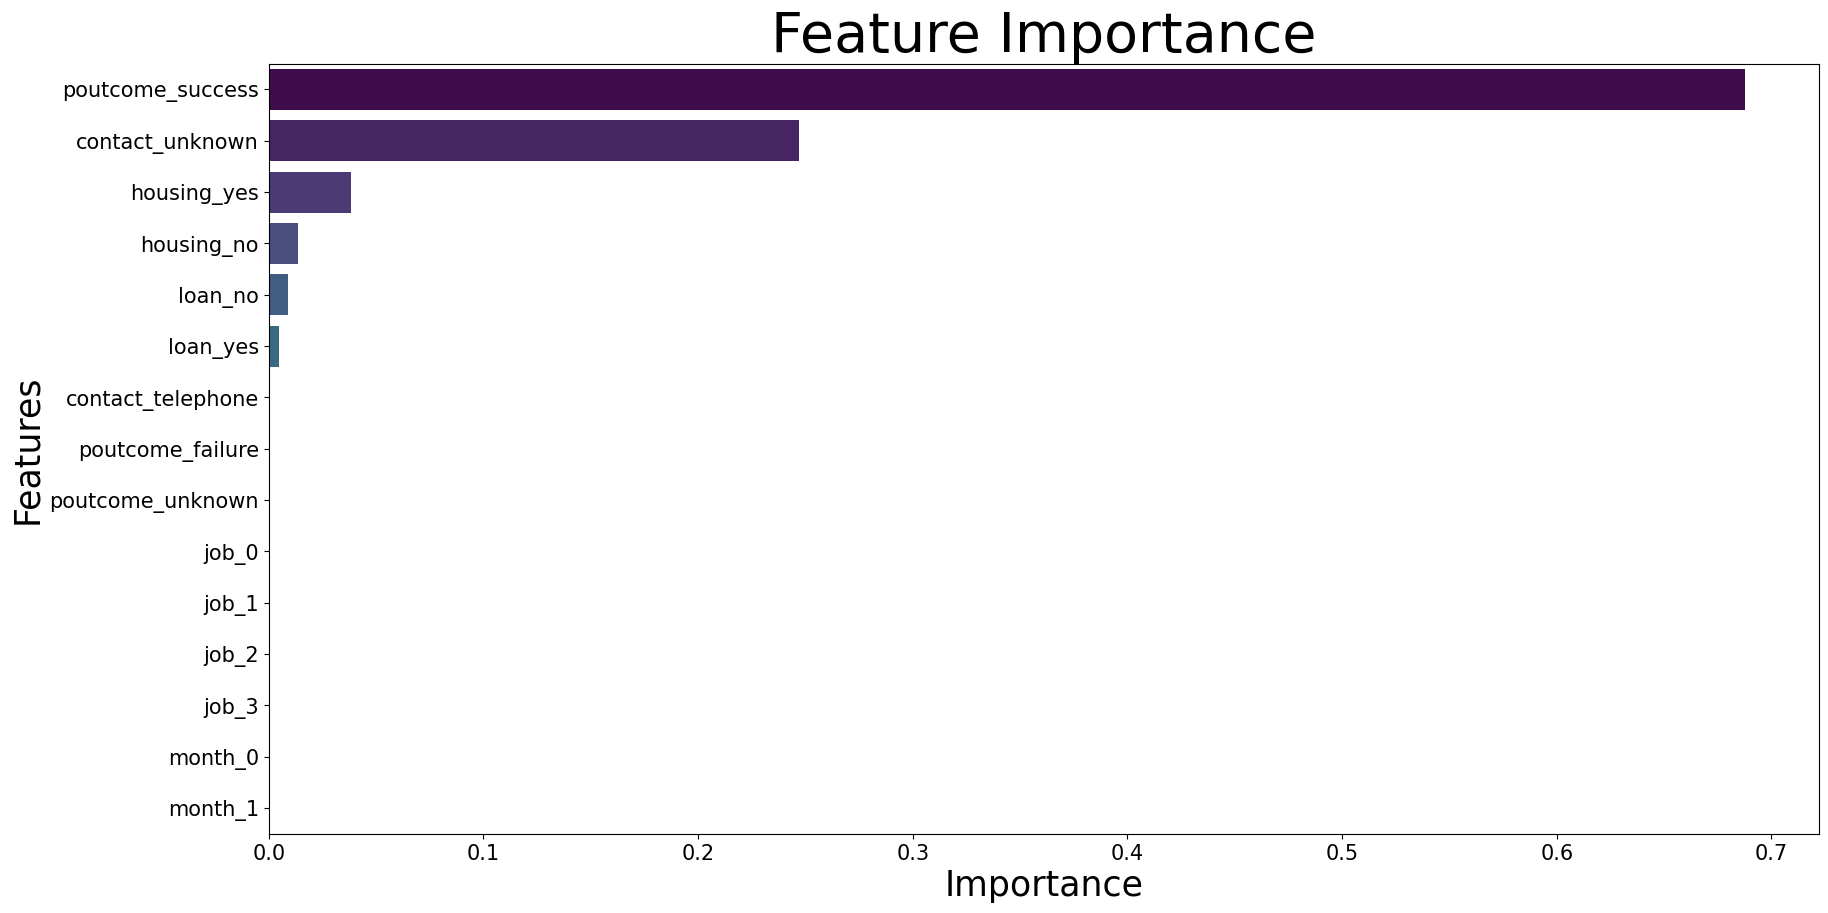

In [455]:

# Membuat bar plot
plt.figure(figsize=(20, 10))

colors = plt.cm.viridis(np.linspace(0, 1, len(feature_df.head(15))))

sns.barplot(data=feature_df.head(15), x='importance', y='features', palette=colors)
plt.xticks(fontsize=15)
plt.xlabel('Importance', fontsize=25)
plt.yticks(fontsize=15)
plt.ylabel('Features', fontsize=25)
plt.title('Feature Importance', fontsize=40)
plt.show()

- poutcome_success (Importance: 0.687681)
    Penjelasan: Fitur ini memiliki pengaruh terbesar terhadap prediksi apakah seseorang akan melakukan deposit atau tidak. Jika hasil sebelumnya dari kampanye pemasaran adalah sukses (poutcome_success), maka kemungkinan besar individu tersebut akan melakukan deposit. Model sangat bergantung pada informasi ini untuk membuat prediksi.

- contact_unknown (Importance: 0.246779)
    Penjelasan: Fitur ini juga cukup penting. Jika cara kontak dengan individu tidak diketahui (contact_unknown), ini memiliki dampak signifikan dalam menentukan apakah individu tersebut akan melakukan deposit. Mungkin ada pola atau ketidakpastian yang terkait dengan kontak yang tidak diketahui yang mempengaruhi keputusan.

- housing_yes (Importance: 0.038421)
    Penjelasan: Kepemilikan rumah (housing_yes) memiliki dampak yang lebih kecil dibandingkan dengan dua fitur pertama tetapi tetap penting. Individu yang memiliki rumah mungkin memiliki karakteristik tertentu (seperti stabilitas finansial) yang mempengaruhi keputusan mereka untuk melakukan deposit.

- housing_no (Importance: 0.013651)
    Penjelasan: Sebaliknya, jika individu tidak memiliki rumah (housing_no), ini juga memberikan informasi kepada model meskipun dampaknya kecil. Ini mungkin menunjukkan kurangnya stabilitas finansial atau faktor lain yang mengurangi kemungkinan deposit.

- loan_no (Importance: 0.008847)
    Penjelasan: Tidak memiliki pinjaman (loan_no) memiliki pengaruh yang sangat kecil terhadap prediksi. Ini mungkin menunjukkan bahwa status pinjaman individu kurang berpengaruh dalam keputusan mereka untuk melakukan deposit.

- loan_yes (Importance: 0.004622)
    Penjelasan: Memiliki pinjaman (loan_yes) juga memiliki pengaruh yang sangat kecil terhadap keputusan deposit. Seperti halnya dengan tidak memiliki pinjaman, ini menunjukkan bahwa status pinjaman individu tidak memainkan peran utama dalam prediksi model.

Secara keseluruhan, fitur-fitur dengan importance yang lebih tinggi (poutcome_success dan contact_unknown) sangat menentukan hasil prediksi model. Ini menunjukkan bahwa hasil kampanye pemasaran sebelumnya dan metode kontak yang digunakan sangat berpengaruh terhadap keputusan individu untuk melakukan deposit. Fitur-fitur lain seperti kepemilikan rumah dan status pinjaman memiliki pengaruh yang lebih kecil tetapi tetap memberikan informasi tambahan yang membantu model dalam membuat prediksi.

In [456]:
import lime
import shap
from lime import lime_tabular

In [470]:
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(data),
    feature_names=data,
    class_names=['Not Deposit', 'Deposit'],
    mode='classification'
)

explainer

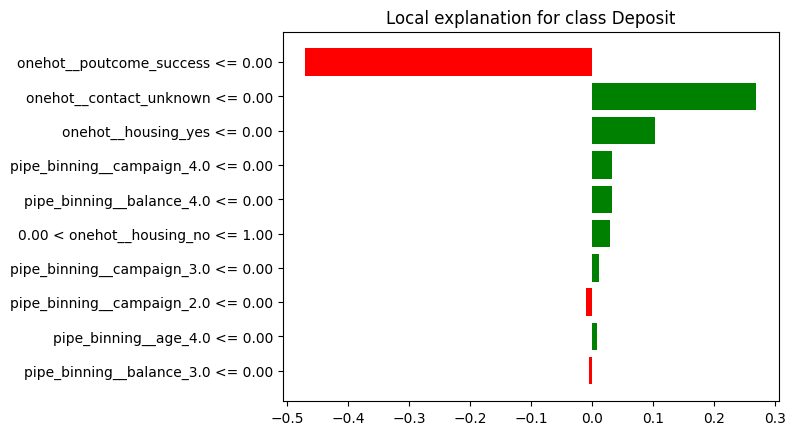

In [471]:
# # Lets compare with the real result

index_costumer = 1

exp = explainer.explain_instance(
    data_row= x_test_prep.iloc[index_costumer],
    predict_fn= my_model.predict_proba,
    num_features= 10
)

exp.as_pyplot_figure()
plt.show()


Insight :
- Berdasarkan untuk poutcome selain poutcome_succes cenderung untuk tidak deposit
- Berdasarkan contact selain dari unknown cenderung untuk melakukan deposit
- Berdasarkan selain nasabah yang memiliki kepemilikan rumah  cenderung untuk melakukan deposit


**Sekarang mari melakukan prediksi terhadap nasabah pada index ke 0 dan interpretasi feature apa saja yang mempengaruhi nasabah tersebut untuk deposit dan tidak deposit**

In [459]:
print(f"The prediction must predict this consumer is: {('Deposit' if y_test.iloc[0] == 1 else 'Not Deposit')} from y_test")

exp = explainer.explain_instance(
    data_row= x_test_prep.iloc[index_costumer],
    predict_fn=my_model.predict_proba
)


exp.show_in_notebook(show_table=True)

The prediction must predict this consumer is: Not Deposit from y_test


**Save Model**

In [460]:
import pickle

In [469]:
# best model 
best_model = randomsearch2.best_estimator_

# fit 
best_model.fit(x, y)

# save with pickle
pickle.dump(best_model, open("ada_best_final_.sav", "wb"))

In [468]:
# load model

model_loaded = pickle.load(open("ada_best_final.sav", "rb"))
model_loaded

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipe_binning',
                                                  Pipeline(steps=[('bin_one',
                                                                   KBinsDiscretizer(strategy='uniform'))]),
                                                  ['age', 'balance',
                                                   'campaign']),
                                                 ('onehot', OneHotEncoder(),
                                                  ['housing', 'loan', 'contact',
                                                   'poutcome']),
                                                 ('binary', BinaryEncoder(),
                                                  ['job', 'month']),
                                                 ('robust', RobustScaler(),
                                                  ['pdays'])])),
                ('modeling',
                 AdaBoostClassifier(algorithm='SAMME',
                                    estimator=DecisionTreeClassifier(max_depth=2,
                                                                     min_samples_leaf=42,
                                                                     min_samples_split=92),
                                    learning_rate=0.1, n_estimators=30,
                                    random_state=0))])

## **Kesimpulan**

### **Sebelum Menggunakan Machine Learning**
<br>

Sebelum menggunakan Machine Learning, perusahaan tidak mengetahui siapa yang akan melakukan deposit. Oleh karena itu, perusahaan memperkirakan kerugian yang disebabkan oleh kehilangan pendapatan ketika nasabah tidak jadi melakukan deposit adalah sebesar 1500$ dan biaya dalam melakukan pemasaran sebesar $ 500

|                 | Predicted (0) | Predicted (1) |
| :-------------: | :-----------: | :-----------: |
| Actual (0)      | 620             | 190          |
| Actual (1)      | 300           |        441    |

- Cost biaya pemasaran  (False Positif) 190 * $ 500 = $ 95.000
- Kerugian akibat nasabah tidak deposit (False Negatif) 300 * $ 1500 = $ 450.000

- Total cost keseluruhan  $ 95.000 + $ 450.000= $ 545.000

### **Setelah menggunakan Machine Learning**
<br>

Setelah memanfaatkan Machine Learning, perusahaan dapat memprediksi target (dalam hal ini pelanggan yang kemungkinan akan melakukan deposit atau tidak) dengan lebih akurat. Hal ini memungkinkan perusahaan mengalokasikan biaya dengan lebih tepat.
<br>

|                 | Predicted (0) | Predicted (1) |
| :-------------: | :-----------: | :-----------: |
| Actual (0)      | 248          | 542            |
| Actual (1)      | 74           | 667             |

- Cost biaya pemasaran  (False Positif) 542 * $ 500 = $ 271.000
- Kerugian akibat nasabah tidak deposit (False Negatif) 74 * $ 1500 = $ 111.000

- Total cost keseluruhan  $ 271.000 + $ 111.000 = $ 382.000

### **Potensi Kerugian Biaya Perusahaan Setelah Machine Learning**
<br>
Setelah dibandingkan berdasarkan perhitungan yang kami lakukan di atas, kami dapat membandingkan kemungkinan kerugian perusahaan. Perkiraan kerugian yang dinyatakan; 

- Prediksi kerugian perusahaan sebelum menggunakan Machine Learning = **$545.000**
- Prediksi kerugian perusahaan setelah menggunakan Machine Learning = **$382.000**

Dengan menggunakan Machine Learnig, perusahaan dapat menghindari potensi kerugian karena kehilangan nasabah / menekan rate False Negatif sebesar 
**$545.000** - **$382.000** = **$163.000**

**Kesimpulan** :

1. **Efisiensi targeting** Model ini membantu  menemukan lebih banyak nasabah yang menginginkan deposito berjangka, sehingga mengurangi kemungkinan mereka yang tidak akan melakukan deposit.

2. **Mengurangi Pengeluaran:** Dengan menggunakan model ini, menggunakan sumber daya dengan lebih bijak dan membelanjakan lebih sedikit uang untuk nasabah yang tidak mau berlangganan.

3. **Fokus terhadap nasabah:** Kini kami lebih baik dalam menargetkan nasabah yang berminat, sehingga menjadikan pengalaman mereka lebih baik dalam melakukan deposit di bank kami.

## **Recommendation**

**improve dari segi data / model**

- Menambahkan fitur affiliate dimana pada feature tersebut bank menawarkan apakah seorang nasabah mau melakukan promosi terhadap rekan, teman dan lingkungannya sehingga nanti ketika dia bergabung untuk program affiliate nasabah tersebut akan mendapatkan keuntungan seperti dibebaskan dari biaya deposit awal, 
- Selalu menggunakan fresh data untuk melakukan prediksi selanjutnya terhadap nasabah menggunakan model 
- Terus periksa seberapa baik kinerja model secara rutin. Jika ada yang tidak beres, perbaiki.

**improve bisnis dari segi bisnis**

- Segmentasi dan Penargetan: Gunakan hasil model untuk melakukan segmentasi nasabah dan menargetkan mereka dengan kampanye pemasaran yang lebih spesifik.
- Personalisasi Penawaran: Kirimkan penawaran yang lebih personal dan relevan berdasarkan profil dan prediksi model terhadap nasabah yang berpotensi tinggi melakukan deposito.
- Optimalisasi Anggaran Pemasaran: Fokuskan anggaran pemasaran pada segmen nasabah yang memiliki probabilitas tinggi untuk melakukan deposito, mengurangi pemborosan sumber daya.
- Efisiensi Operasional: Minimalkan upaya yang tidak perlu terhadap nasabah yang tidak tertarik, sehingga sumber daya manusia dan finansial dapat dialokasikan dengan lebih efektif.
- Peningkatan Layanan Pelanggan: Gunakan wawasan dari model untuk meningkatkan layanan pelanggan dengan memberikan pengalaman yang lebih baik dan lebih personal kepada nasabah
- Retensi Nasabah: Fokus pada nasabah yang menunjukkan minat tinggi untuk meningkatkan retensi melalui program loyalitas atau penawaran khusus.
- Umpan Balik dan Pembelajaran: Kumpulkan umpan balik dari nasabah yang merespons kampanye pemasaran dan gunakan data ini untuk terus memperbaiki model dan strategi pemasaran.